In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip3 install free-proxy

  Preparing metadata (setup.py) ... done
  Created wheel for free-proxy: filename=free_proxy-1.1.1-py3-none-any.whl size=5642 sha256=8f1559300669a5bbec654c2e2db6cdbf8ebe55ce46cc8a566bd1a390373483da
  Stored in directory: /root/.cache/pip/wheels/5a/96/c7/5a434714fff4fea9a59075428b142626e0a74f8c3bf90a50d0
Successfully built free-proxy


In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

In [7]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import os
import json
import time
import collections
from google.colab import files
from datetime import datetime as dt
from datetime import timedelta as td
from fp.fp import FreeProxy
#import matplotlib.pyplot as plt
#%matplotlib inline
pd.options.display.max_colwidth = 180
pd.options.display.max_rows = None
headers = {'User-Agent': 'Mozilla/5.0 (Windows NT 6.3; Win64; x64; rv:91.0) Gecko/20100101 Firefox/91.0'}

#'L_Ch':'https://www.betexplorer.com/football/europe/champions-league/results/',
#'L_Eu':'https://www.betexplorer.com/football/europe/europa-league/results/',

#'Ire':'https://www.betexplorer.com/football/ireland/premier-division-',

links_eu={
       # 02.08 'Aus':'https://www.betexplorer.com/football/austria/bundesliga-',
       'Bea.':'https://www.betexplorer.com/football/belarus/vysshaya-liga-',
       # 26.07 'Bel':'https://www.betexplorer.com/football/belgium/jupiler-pro-league-',
       'Bul':'https://www.betexplorer.com/football/bulgaria/parva-liga-',
       # 02.08 'Cro':'https://www.betexplorer.com/football/croatia/hnl-',
       'Cze':'https://www.betexplorer.com/football/czech-republic/chance-liga-',
       'Den':'https://www.betexplorer.com/football/denmark/superliga-',
       # 16.08 'Eng':'https://www.betexplorer.com/football/england/premier-league-',
       # 18.08 'Fra':'https://www.betexplorer.com/football/france/ligue-1-',
       # 23.08 'Ger':'https://www.betexplorer.com/football/germany/bundesliga-',
       #'Gre':'https://www.betexplorer.com/football/greece/super-league-',
       # 09.08 'Hol':'https://www.betexplorer.com/football/netherlands/eredivisie-',
       'Hun':'https://www.betexplorer.com/football/hungary/otp-bank-liga-',
       # 18.08 'Ita':'https://www.betexplorer.com/football/italy/serie-a-',
       # 10.08 'NIr':'https://www.betexplorer.com/football/northern-ireland/nifl-premiership-',
       'Pol':'https://www.betexplorer.com/football/poland/ekstraklasa-',
       #'Por':'https://www.betexplorer.com/football/portugal/liga-portugal-',
       'Rom':'https://www.betexplorer.com/football/romania/liga-1-',
       'Rus':'https://www.betexplorer.com/football/russia/premier-league-',
       'Ser':'https://www.betexplorer.com/football/serbia/super-liga-',
       # 03.08 'Sco':'https://www.betexplorer.com/football/scotland/premiership-',
       #'Sla':'https://www.betexplorer.com/football/slovakia/nike-liga-',
       #'Sle':'https://www.betexplorer.com/football/slovenia/prva-liga-',
       # 15.08 'Spa':'https://www.betexplorer.com/football/spain/laliga-',
       # 09.08'Wal':'https://www.betexplorer.com/football/wales/cymru-premier-',
       'Sui':'https://www.betexplorer.com/football/switzerland/super-league-',
       #'Tur':'https://www.betexplorer.com/football/turkey/super-lig-',
       'Ice.':'https://www.betexplorer.com/football/iceland/besta-deild-karla-',
       'Swe.':'https://www.betexplorer.com/football/sweden/allsvenskan-',
       'Nor.':'https://www.betexplorer.com/football/norway/eliteserien-',
       'Fin.':'https://www.betexplorer.com/football/finland/veikkausliiga-',
}

links_eu2={
       # 03.08 'Aus':'https://www.betexplorer.com/football/austria/2-liga-',
       # 16.08 'Bel': 'https://www.betexplorer.com/football/belgium/challenger-pro-league-',
       #'Bul':'https://www.betexplorer.com/football/bulgaria/vtora-liga-',
       #'Cze':'https://www.betexplorer.com/football/czech-republic/fnl-',
       #'Den':'https://www.betexplorer.com/football/denmark/1st-division-',
       # 09.08 'En2':'https://www.betexplorer.com/football/england/championship-',
       # 09.08 'En3':'https://www.betexplorer.com/football/england/league-one-',
       # 09.08 'En4':'https://www.betexplorer.com/football/england/league-two-',
       # 17.08 'Fra':'https://www.betexplorer.com/football/france/ligue-2-',
       # 02.08 'Ger':'https://www.betexplorer.com/football/germany/2-bundesliga-',
       # 09.08 'Hol':'https://www.betexplorer.com/football/netherlands/eerste-divisie-',
       #'Hun':'https://www.betexplorer.com/football/hungary/merkantil-bank-liga-',
       #'Ita':'https://www.betexplorer.com/football/italy/serie-b-',
       #'Pol':'https://www.betexplorer.com/football/poland/division-1-',
       #'Por':'https://www.betexplorer.com/football/portugal/liga-portugal-2-',
       #'Rus':'https://www.betexplorer.com/football/russia/fnl-',
       #'Sco': 'https://www.betexplorer.com/football/scotland/championship-',
       #'Ser':'https://www.betexplorer.com/football/serbia/prva-liga-',
       #'Sla':'https://www.betexplorer.com/football/slovakia/2-liga-',
       # 15.08 'Spa':'https://www.betexplorer.com/football/spain/laliga2-',
       #'Sui':'https://www.betexplorer.com/football/switzerland/challenge-league-',

       'Ice.':'https://www.betexplorer.com/football/iceland/division-1-',
       'Nor.':'https://www.betexplorer.com/football/norway/obos-ligaen-',
       'Swe.':'https://www.betexplorer.com/football/sweden/superettan-',
       'Fin.':'https://www.betexplorer.com/football/finland/ykkosliiga-',
}

links_am={'Mex':'https://www.betexplorer.com/football/mexico/liga-mx-',
       'Arg':'https://www.betexplorer.com/football/argentina/liga-profesional-',
       'Bra':'https://www.betexplorer.com/football/brazil/serie-a-',
       #'Kore.':'https://www.betexplorer.com/football/south-korea/k-league-1-',
       #'USA .':'https://www.betexplorer.com/football/usa/mls-',
       'Bol':'https://www.betexplorer.com/football/bolivia/division-profesional-',
       #'Chi.':'https://www.betexplorer.com/football/china/super-league-',
       'Uru.':'https://www.betexplorer.com/football/uruguay/primera-division-',
       'Chi.':'https://www.betexplorer.com/football/chile/primera-division-',
       'Col':'https://www.betexplorer.com/football/colombia/liga-aguila-',
       'Cos':'https://www.betexplorer.com/football/costa-rica/primera-division-',
       'Ecu.':'https://www.betexplorer.com/football/ecuador/liga-pro-',
       #'Egyp':'https://www.betexplorer.com/football/egypt/premier-league-',
       #'Jap1.':'https://www.betexplorer.com/football/japan/j1-league-',
       #'Jap2.':'https://www.betexplorer.com/football/japan/j2-league-',
       'Par.':'https://www.betexplorer.com/football/paraguay/primera-division-',
       'Per.':'https://www.betexplorer.com/football/peru/liga-1-',
       'Ven.':'https://www.betexplorer.com/football/venezuela/primera-division-'
}

links_alt={'Aus':'https://www.betexplorer.com/football/austria/tipico-bundesliga-',
           'Bel':'https://www.betexplorer.com/football/belgium/jupiler-league-',
           'Por':'https://www.betexplorer.com/football/portugal/primeira-liga-',
           'Wal':'https://www.betexplorer.com/football/wales/premier-league-',
           'Sui':'https://www.betexplorer.com/football/switzerland/super-league-',
           'Ice.':'https://www.betexplorer.com/football/iceland/pepsideild-',
           'Cro':'https://www.betexplorer.com/football/croatia/1-hnl-',
           'Cze':'https://www.betexplorer.com/football/czech-republic/fortuna-liga-',
           'Ser':'https://www.betexplorer.com/football/serbia/super-liga-2022-2023-',
           'Sla':'https://www.betexplorer.com/football/slovakia/fortuna-liga-',
           'Cze': 'https://www.betexplorer.com/football/czech-republic/fortuna-liga-',}

links_alt2 = {'Bel': 'https://www.betexplorer.com/football/belgium/1b-pro-league-',

              }

www='https://www.betexplorer.com'
path="/content/drive/My Drive/BetExplorer/"

In [ ]:
r = requests.get('https://www.betexplorer.com/football/czech-republic/', headers=headers)
s = BeautifulSoup(r.text, 'html.parser')



In [ ]:
# Кефы на гостей больше 4. Все чемпионаты
def date_reverse(d):
  try:
    d = d.split('.')
    if int(d[1]) > 6:
      return f"23.{d[1]}.{d[0]}"
    return f"24.{d[1]}.{d[0]}"
  except AttributeError:
    return d


all_champs = pd.read_excel(path + 'Europe2024.xlsm', sheet_name=None, usecols='A:H', header=None, dtype={7: str})
all_champs.pop('1')
all_champs.pop('TMP')
all_champs.pop('Ire')
all_champs_df = pd.DataFrame(columns='Team Opp Sc1 Sc2 K1 K2 K3 Date'.split())
for country,champ in all_champs.items():
  champ.columns = 'Team Opp Sc1 Sc2 K1 K2 K3 Date'.split()
  champ['Date'] = champ.Date.apply(date_reverse)
  all_champs[country] = champ.dropna()
  all_champs_df = pd.concat([all_champs_df, champ])


In [ ]:
# ПОБЕДЫ ГОСТЕЙ С БОЛЬШИМИ КЭФАМИ С УЧЕТОМ ФОРЫ
def wl_calc(r):
  fora = 0
  if r['Sc1'] < r['Sc2'] + fora:
    return 'W'
  elif r['Sc1'] - fora > r['Sc2']:
    return 'L'
  else:
    return 'D'

over4_df = all_champs_df.copy()
over4_df = over4_df.query("2.5 < K3 < 3.5")
over4_df['WL'] = over4_df.apply(wl_calc, axis=1)
over4_df = (over4_df
    .sort_values('Date')
    .reset_index(drop=True)
    .astype({'Sc1': int, 'Sc2': int}))

display(over4_df.tail(22), dict(over4_df.value_counts('WL')))

,Team,Opp,Sc1,Sc2,K1,K2,K3,Date,WL
1551,Strasbourg,Metz,2,1,2.11,3.54,3.39,24.05.12,L
1552,Debrecen,Fehervar FC,1,0,2.00,3.49,3.30,24.05.12,L
1553,Widzew Lodz,Zaglebie,1,3,2.19,3.58,2.91,24.05.12,W
1554,Puszcza,Warta Poznan,1,0,2.37,2.97,3.12,24.05.12,L
1555,Lech Poznan,Legia,1,2,2.27,3.16,3.11,24.05.12,W
1556,Norrkoping,Hammarby,1,2,2.49,3.48,2.65,24.05.12,W
1557,Rennes,Lens,1,1,2.26,3.57,3.04,24.05.12,D
1558,Fakel Voronezh,Ural,0,0,2.94,2.80,3.05,24.05.12,D
1559,Lahti,Mariehamn,3,0,2.47,3.09,2.84,24.05.12,L
1560,Radomiak Radom,Ruch Chorzow,0,2,2.09,3.40,3.30,24.05.13,W


{'L': 621, 'D': 494, 'W': 458}

In [ ]:
# СУММЫ ПО ДНЯМ И ОБЩАЯ СУММА
dates = sorted(list(set(over4_df['Date'])))
rows = []
summa_all = 0
for date in dates:
  over = over4_df.query(f"Date == '{date}'")
  wl_dict = dict(over.value_counts('WL'))
  if wl_dict.get('W', 0) == 0:
    wl_dict['W'] = 0
  if wl_dict.get('L', 0) == 0:
    wl_dict['L'] = 0
  if wl_dict.get('D', 0) == 0:
    wl_dict['D'] = 0
  summa = over.query("WL == 'W'")['K3'].sum()
  summa = round(summa - wl_dict['W'] - wl_dict['L'] - wl_dict['D'], 1)
  summa_all += summa
  wl_dict['S'] = summa
  wl_dict.update({'Date': date})
  rows.append(wl_dict)
  print(f"{date} - {wl_dict}")

print('Общая сумма:', summa_all)

23.07.14 - {'D': 2, 'W': 1, 'L': 0, 'S': 0.4, 'Date': '23.07.14'}
23.07.15 - {'D': 1, 'W': 0, 'L': 0, 'S': -1.0, 'Date': '23.07.15'}
23.07.16 - {'D': 2, 'W': 0, 'L': 0, 'S': -2.0, 'Date': '23.07.16'}
23.07.21 - {'W': 1, 'L': 0, 'D': 0, 'S': 2.3, 'Date': '23.07.21'}
23.07.22 - {'L': 1, 'W': 1, 'D': 0, 'S': 1.4, 'Date': '23.07.22'}
23.07.23 - {'W': 3, 'D': 2, 'L': 1, 'S': 2.1, 'Date': '23.07.23'}
23.07.24 - {'D': 1, 'W': 0, 'L': 0, 'S': -1.0, 'Date': '23.07.24'}
23.07.28 - {'W': 2, 'L': 1, 'D': 0, 'S': 3.4, 'Date': '23.07.28'}
23.07.29 - {'L': 7, 'D': 6, 'W': 2, 'S': -9.5, 'Date': '23.07.29'}
23.07.30 - {'L': 5, 'D': 3, 'W': 2, 'S': -4.8, 'Date': '23.07.30'}
23.07.31 - {'W': 2, 'L': 0, 'D': 0, 'S': 3.9, 'Date': '23.07.31'}
23.08.04 - {'L': 3, 'D': 1, 'W': 1, 'S': -1.7, 'Date': '23.08.04'}
23.08.05 - {'W': 6, 'L': 4, 'D': 2, 'S': 6.0, 'Date': '23.08.05'}
23.08.06 - {'L': 4, 'D': 3, 'W': 3, 'S': -0.5, 'Date': '23.08.06'}
23.08.07 - {'L': 4, 'W': 1, 'D': 0, 'S': -2.1, 'Date': '23.08.07'}
23

In [ ]:
def weekday(date):
  date = dt.strptime(date, '%y.%m.%d')
  return weekdays[date.weekday()]

weekdays = {0: 'Пн', 1: 'Вт', 2: 'Ср', 3: 'Че', 4: 'Пт', 5: 'Су', 6: 'Вс'}
final_df = pd.DataFrame(rows)
final_df = final_df['Date W D L S'.split()]
final_df['Day'] = final_df.Date.apply(weekday)
for day in weekdays.values():
  print(day, final_df.query(f"Day == '{day}'").sum()['S'])

Пн 5.699999999999998
Вт -3.9000000000000004
Ср -9.1
Че -19.2
Пт -17.700000000000003
Су -108.39999999999999
Вс -66.3


In [ ]:
print(over4_df.value_counts('WL'))
print(over4_df.query(f"WL == 'W'")['K3'].sum())


WL
L    621
D    494
W    458
Name: count, dtype: int64
1353.9


In [ ]:
# Исходы для одного чемпионата
def calc_seq(seq: list):
    elements = [x for x in list(set(seq)) if 'P' not in x]
    curr_element = seq[0]
    result = ''
    curr_seria = 1
    for c in range(1, len(seq)):
        if seq[c] != curr_element:
            result += f'{curr_seria}{curr_element}, '
            curr_seria = 1
            curr_element = seq[c]
        else:
            curr_seria += 1
    result += f'{curr_seria}{curr_element}'
    return result

def swap_data(r):
  r['Team'], r['Opp'] = r['Opp'], r['Team']
  r['K1'], r['K3'] = r['K3'], r['K1']
  r['Sc1'], r['Sc2'] = r['Sc2'], r['Sc1']
  r['HA'] = '@'
  return r

def win_lose(r):
    if r['Sc1'] == r['Sc2']:
      r['WL'] = 'D'
    elif r['Sc1'] > r['Sc2']:
      r['WL'] = 'W'
    else:
      r['WL'] = 'L'
    return r

def results_series(l):
    ch = l[0]
    i=0
    ll = []
    for c in l:
        if c == ch:
            i += 1
        else:
            ll.append(str(i) + ch)
            i = 1
            ch = c
    ll.append(str(i) + ch)
    return ll[-1]


all_teams_dict = {}
champ = pd.read_excel(path + 'Europe2022.xlsm', sheet_name='Eng', usecols='A:H', header=None, dtype={7:str})
champ.columns = 'Team Opp Sc1 Sc2 K1 K2 K3 Date'.split()
champ.insert(8, 'WL', ['']*len(champ))
champ.insert(9, 'WLS', ['']*len(champ))
champ.insert(2, 'HA', ['']*len(champ))
teams = sorted(list(set(champ['Team'].to_list())))
champ['Date'] = [dt.strptime('22.' + str(x), '%y.%d.%m') for x in champ['Date'].to_list()]
for team in teams:
  home = champ[champ.Team == team]
  away = champ[champ.Opp == team]
  away = away.apply(swap_data, axis=1)
  home = home.append(away)
  home = home.sort_values('Date')
  home = home.apply(win_lose, axis=1)
  home= home.reset_index(drop=True)
  wls = ['-']
  for i in range(1, len(home)):
    wls.append(results_series(home['WL'].to_list()[:i]))
  home['WLS'] = wls
  all_teams_dict[team] = home

curr_df = all_teams_dict['Jerv']
wls2 = ['-']
for row in range(1, len(curr_df)):
  date = curr_df.at[row, 'Date']
  opp = curr_df.at[row, 'Opp']
  opp_df = all_teams_dict[opp]
  opp_wl = opp_df[opp_df.Date == date]['WLS']
  opp_wl = opp_wl.to_list()[0]
  wls2.append(opp_wl)

curr_df['WLS2'] = wls2
curr_df

KeyError: ignored

In [ ]:
# Исходы для одного чемпионата (все команды)
def calc_seq(seq: list):
    elements = [x for x in list(set(seq)) if 'P' not in x]
    curr_element = seq[0]
    result = ''
    curr_seria = 1
    for c in range(1, len(seq)):
        if seq[c] != curr_element:
            result += f'{curr_seria}{curr_element}, '
            curr_seria = 1
            curr_element = seq[c]
        else:
            curr_seria += 1
    result += f'{curr_seria}{curr_element}'
    return result

def swap_data(r):
  r['Team'], r['Opp'] = r['Opp'], r['Team']
  r['K1'], r['K3'] = r['K3'], r['K1']
  r['Sc1'], r['Sc2'] = r['Sc2'], r['Sc1']
  r['HA'] = '@'
  return r

def win_lose(r):
    if r['Sc1'] == r['Sc2']:
      r['WL'] = 'D'
    elif r['Sc1'] > r['Sc2']:
      r['WL'] = 'W'
    else:
      r['WL'] = 'L'
    return r

def results_series(l):
    ch = l[0]
    i=0
    ll = []
    for c in l:
        if c == ch:
            i += 1
        else:
            ll.append(str(i) + ch)
            i = 1
            ch = c
    ll.append(str(i) + ch)
    return ll[-1]


all_teams_dict = {}
all_teams_df = pd.DataFrame(columns='Team HA Opp Sc1 Sc2 K1 K2 K3 Date WL WLS'.split())
champ = pd.read_excel(path + 'Europe2022.xlsm', sheet_name='Rus', usecols='A:H', header=None, dtype={7:str})
champ.columns = 'Team Opp Sc1 Sc2 K1 K2 K3 Date'.split()
champ.insert(8, 'WL', ['']*len(champ))
champ.insert(9, 'WLS', ['']*len(champ))
champ.insert(2, 'HA', ['']*len(champ))
teams = sorted(list(set(champ['Team'].to_list())))
champ['Date'] = [dt.strptime('22.' + str(x), '%y.%d.%m') for x in champ['Date'].to_list()]
for team in teams:
  home = champ[champ.Team == team]
  away = champ[champ.Opp == team]
  away = away.apply(swap_data, axis=1)
  home = home.append(away)
  home = home.sort_values('Date')
  home = home.apply(win_lose, axis=1)
  home= home.reset_index(drop=True)
  wls = ['-']
  for i in range(1, len(home)):
    wls.append(results_series(home['WL'].to_list()[:i]))
  home['WLS'] = wls
  all_teams_dict[team] = home
  all_teams_df = all_teams_df.append(home)

all_teams_df = all_teams_df.reset_index(drop=True)
wls2 = ['-']
for row in range(1, len(all_teams_df)):
  date = all_teams_df.at[row, 'Date']
  opp = all_teams_df.at[row, 'Opp']
  opp_wl = list(all_teams_df.query(f"Date == '{date}' and Team == '{opp}'")['WLS'])[0]
  wls2.append(opp_wl)

all_teams_df['WLS2'] = wls2
display(all_teams_df.head())

rows = []
for i in range(1,7):
  tmp = dict(all_teams_df.query(f"WLS == '{i}W' and WLS2 == '1L'").value_counts('WL'))
  for w in ['W', 'L', 'D']:
    if tmp.get(w, 0) == 0:
      tmp[w] = 0
  rows.append(tmp)

stat_df = pd.DataFrame(rows, index=range(1,7)).T
stat_df.columns = [f'win{x}' for x in range(1,7)]

display(stat_df)

,Team,HA,Opp,Sc1,Sc2,K1,K2,K3,Date,WL,WLS,WLS2
0,Akhmat Grozny,,Spartak Moscow,1,1,2.53,3.25,2.87,2022-07-16,D,-,-
1,Akhmat Grozny,,Fakel Voronezh,2,1,1.80,3.74,4.39,2022-07-24,W,1D,1D
2,Akhmat Grozny,@,Sochi,1,2,3.62,3.49,2.05,2022-07-30,L,1W,1L
3,Akhmat Grozny,,Zenit,0,0,6.51,4.57,1.47,2022-08-06,D,1L,2W
4,Akhmat Grozny,@,Khimki,3,1,2.54,3.19,2.91,2022-08-14,W,1D,1W


,win1,win2,win3,win4,win5,win6
W,7,3,0,0,1,0
L,5,1,0,0,0,0
D,2,2,1,0,0,0


In [ ]:
rows = []

for i in range(1,7):
  tmp = dict(all_teams_df.query(f"WLS == '{i}D' and WLS2 == '1L'").value_counts('WL'))
  for w in ['W', 'L', 'D']:
    if tmp.get(w, 0) == 0:
      tmp[w] = 0
  rows.append(tmp)

stat_df = pd.DataFrame(rows, index=range(1,7)).T
stat_df.columns = [f'win{x}' for x in range(1,7)]

display(stat_df)

,win1,win2,win3,win4,win5,win6
L,3,1,0,0,0,0
W,3,1,1,0,0,0
D,0,1,0,1,0,0


In [ ]:
# Командный тотал для одного чемпионата
def calc_seq(seq: list):
    elements = [x for x in list(set(seq)) if 'P' not in x]
    curr_element = seq[0]
    result = ''
    curr_seria = 1
    for c in range(1, len(seq)):
        if seq[c] != curr_element:
            result += f'{curr_seria}{curr_element}, '
            curr_seria = 1
            curr_element = seq[c]
        else:
            curr_seria += 1
    result += f'{curr_seria}{curr_element}'
    return result

def swap_data(r):
  r['Team'], r['Opp'] = r['Opp'], r['Team']
  r['K1'], r['K3'] = r['K3'], r['K1']
  r['Sc1'], r['Sc2'] = r['Sc2'], r['Sc1']
  r['HA'] = '@'
  return r

all_teams = {}
champ = pd.read_excel(path + 'Europe2022.xlsm', sheet_name='Sui', usecols='A, B, C, D, E, F, G, H', header=None)
champ.columns = 'Team Opp Sc1 Sc2 K1 K2 K3 Date'.split()
champ.insert(2, 'HA', ['']*len(champ))
teams = sorted(list(set(champ['Team'].to_list())))
champ['Date'] = [dt.strptime('22.' + str(x), '%y.%d.%m') for x in champ['Date'].to_list()]
for team in teams:
  home = champ[champ.Team == team]
  away = champ[champ.Opp == team]
  away = away.apply(swap_data, axis=1)
  home = home.append(away)
  home = home.sort_values('Date')
  home= home.reset_index(drop=True)

  l = home['Sc1'].to_list()
  l = [0] + [round(sum(l[:x])/x, 2)  for x in range(1, len(l))]
  home['AvO'] = l
  l = home['Sc2'].to_list()
  l = [0] + [round(sum(l[:x])/x, 2)  for x in range(1, len(l))]
  home['AvD'] = l

  home = home.eval("Tot=Sc1+Sc2")
  home['Tot'] = home.Tot.apply(lambda x: 'u' if x <2 else 'o')
  tot_seria = []
  tot_seria_last = []
  tot_seria.append('-')
  tot_seria_last.append('-')
  for row in range(1, len(home)):
    s = home['Tot'].to_list()[:row]
    curr_seria = calc_seq(s)
    tot_seria.append(curr_seria)
    tot_seria_last.append(curr_seria.split(', ')[-1])

  home['SeriaLast'] = tot_seria_last
  home['Seria'] = tot_seria
  all_teams[team] = home

all_ser = []
for k,v in all_teams.items():
  ser = all_teams[k]['SeriaLast'].to_list()[1:]
  all_ser += ser

print('1u:', all_ser.count('1u'))
print('2u:', all_ser.count('2u'))
print('3u:', all_ser.count('3u'))
print('4u:', all_ser.count('4u'))
print('5u:', all_ser.count('5u'))

1u: 9
2u: 1
3u: 0
4u: 0
5u: 0


In [ ]:
# Командный тотал для всех чемпионатов
def calc_seq(seq: list):
    elements = [x for x in list(set(seq)) if 'P' not in x]
    curr_element = seq[0]
    result = ''
    curr_seria = 1
    for c in range(1, len(seq)):
        if seq[c] != curr_element:
            result += f'{curr_seria}{curr_element}, '
            curr_seria = 1
            curr_element = seq[c]
        else:
            curr_seria += 1
    result += f'{curr_seria}{curr_element}'
    return result

def swap_data(r):
  r['Team'], r['Opp'] = r['Opp'], r['Team']
  r['K1'], r['K3'] = r['K3'], r['K1']
  r['Sc1'], r['Sc2'] = r['Sc2'], r['Sc1']
  r['HA'] = '@'
  return r

def calc_procent(row, i):
  if sum(row[i:]) == row[i]:
    return 100
  else:
    return int(row[i]/sum(row[i:]) * 100)


idx = []
rows = []
all_champs = pd.read_excel(path + 'Europe2022.xlsm', sheet_name=None, usecols='A, B, C, D, E, F, G, H', header=None)
all_champs.pop('1')
all_champs.pop('TMP')
all_champs.pop('Ire')
all_dicts = {}
for country,champ in all_champs.items():
  all_teams = {}
  champ.columns = 'Team Opp Sc1 Sc2 K1 K2 K3 Date'.split()
  champ.insert(2, 'HA', ['']*len(champ))
  teams = sorted(list(set(champ['Team'].to_list())))
  champ['Date'] = [dt.strptime('22.' + str(x), '%y.%d.%m') for x in champ['Date'].to_list()]
  for team in teams:
    home = champ[champ.Team == team]
    away = champ[champ.Opp == team]
    away = away.apply(swap_data, axis=1)
    home = home.append(away)
    home = home.sort_values('Date')
    home= home.reset_index(drop=True)

    l = home['Sc1'].to_list()
    l = [0] + [round(sum(l[:x])/x, 2)  for x in range(1, len(l))]
    home['AvO'] = l
    l = home['Sc2'].to_list()
    l = [0] + [round(sum(l[:x])/x, 2)  for x in range(1, len(l))]
    home['AvD'] = l

    home = home.eval("Tot=Sc1+Sc2")
    home['Tot'] = home.Tot.apply(lambda x: 'u' if x <2 else 'o')
    tot_seria = []
    tot_seria_last = []
    tot_seria.append('-')
    tot_seria_last.append('-')
    for row in range(1, len(home)):
      s = home['Tot'].to_list()[:row]
      curr_seria = calc_seq(s)
      tot_seria.append(curr_seria)
      tot_seria_last.append(curr_seria.split(', ')[-1])

    home['SeriaLast'] = tot_seria_last
    home['Seria'] = tot_seria
    all_teams[team] = home
  all_dicts[country] = all_teams
  all_ser = []
  for k,v in all_teams.items():
    ser = all_teams[k]['SeriaLast'].to_list()[1:]
    all_ser += ser

  idx.append(country)
  row = [all_ser.count('1u'), 0, all_ser.count('2u'), 0, all_ser.count('3u'), 0, all_ser.count('4u')]
  row[1] = calc_procent(row, 0)
  row[3] = calc_procent(row, 2)
  row[5] = calc_procent(row, 4)
  rows.append(row)

all_totals = pd.DataFrame(np.array(rows, dtype=object), index=idx, columns='U1 U1Pr U2 U2Pr U3 U3Pr U4'.split())
display(all_totals)

,U1,U1Pr,U2,U2Pr,U3,U3Pr,U4
Aus,26,81,6,100,0,100,0
Bel,47,87,6,85,1,100,0
Bul,67,72,22,88,3,100,0
Cro,29,74,9,90,1,100,0
Cze,30,93,2,100,0,100,0
Den,34,77,8,80,1,50,1
Eng,57,83,9,81,2,100,0
Fra,43,71,11,64,4,66,2
Ger,34,80,8,100,0,100,0
Gre,31,73,10,90,1,100,0


In [ ]:
all_totals[all_totals.U1Pr < 70]

,U1,U1Pr,U2,U2Pr,U3,U3Pr,U4
Rom,61,64,23,69,9,90,1


In [ ]:
tmp = pd.DataFrame()
for k,v in all_teams.items():
  tmp = tmp.append(v)

tmp = tmp.sort_values('Date').drop([0])
tmp

In [ ]:
# Тоталы и средние всех команд
def get_opp_total(df1, team, teams):
  df2 = pd.DataFrame()
  for idx in range(len(df1)):
    opp = df1.at[idx, 'Opp']
    date = df1.at[idx, 'Date']
    opp = teams[opp]
    opp = opp[opp.Date == date][['AvO', 'AvD', 'SeriaLast']]
    df2 = df2.append(opp)

  df1['AvO2'] = df2['AvO'].to_list()
  df1['AvD2'] = df2['AvD'].to_list()
  df1['SeriaLast2'] = df2['SeriaLast'].to_list()
  return df1


for champ,teams in all_dicts.items():
  totals_stat = pd.DataFrame()
  for team, res in teams.items():

    tot_seria = ['-']
    tot_seria_last = ['-']
    team_df = res.copy()
    for row in range(1, len(res)):
      s = res['Tot'].to_list()[:row]
      curr_seria = calc_seq(s)
      tot_seria.append(curr_seria)
      tot_seria_last.append(curr_seria.split(', ')[-1])

    team_df['SeriaLast'] = tot_seria_last
    team_df['Seria'] = tot_seria
    team_df = get_opp_total(team_df, team, teams)
    totals_stat = totals_stat.append(team_df[['AvO', 'AvD', 'Tot', 'SeriaLast', 'AvO2', 'AvD2', 'SeriaLast2']][1:])
    #display(team_df, team_df[['AvO', 'AvD', 'Tot', 'SeriaLast', 'AvO2', 'AvD2', 'SeriaLast2']][1:])

#totals_stat

In [ ]:
seq = totals_stat.query("1>AvD and 2>AvO2")['Tot'].to_list()
calc_seq(seq)

'3o, 2u, 5o'

In [ ]:
all_dicts.keys()

dict_keys(['Aus', 'Bel', 'Bul', 'Cro', 'Cze', 'Den', 'Eng', 'Fra', 'Ger', 'Gre', 'Hol', 'Hun', 'Ita', 'NIr', 'Pol', 'Por', 'Rom', 'Rus', 'Sco', 'Ser', 'Sla', 'Sle', 'Spa', 'Sui', 'Tur', 'Wal', 'Bea', 'Fin', 'Swe', 'Nor', 'Ice'])

In [ ]:
df2 = pd.DataFrame()
all_teams = all_dicts['Fra']
df1 = all_teams['Nice']
for idx in range(len(df1)):
  opp = df1.at[idx, 'Opp']
  date = df1.at[idx, 'Date']
  opp = all_teams[opp]
  opp = opp[opp.Date == date][['AvO', 'AvD', 'SeriaLast']]
  df2 = df2.append(opp)

df1['AvO2'] = df2['AvO'].to_list()
df1['AvD2'] = df2['AvD'].to_list()
df1['SeriaLast2'] = df2['SeriaLast'].to_list()
df1

,Team,Opp,HA,Sc1,Sc2,K1,K2,K3,Date,AvO,AvD,Tot,SeriaLast,Seria,AvO2,AvD2,SeriaLast2
0,Nice,Paris SG,@,1,2,12.15,6.85,1.21,2022-01-01,0.00,0.00,o,-,-,0.00,0.00,-
1,Nice,Troyes,,3,2,1.85,3.45,4.52,2022-01-09,1.00,2.00,o,1o,1o,2.00,2.00,1o
2,Nice,Auxerre,@,1,1,2.09,3.41,3.58,2022-01-16,2.00,2.00,o,2o,2o,1.00,1.50,2o
3,Nice,Nantes,,1,1,2.06,3.37,3.73,2022-01-23,1.67,1.67,o,3o,3o,1.67,2.67,3o
4,Nice,Lorient,@,2,1,2.74,3.21,2.66,2022-01-30,1.50,1.50,o,4o,4o,1.50,1.00,1o
5,Nice,Toulouse,@,1,1,2.89,3.25,2.51,2022-08-07,1.60,1.40,o,5o,5o,2.00,2.00,5o
6,Nice,Strasbourg,,1,1,2.23,3.28,3.34,2022-08-14,1.50,1.33,o,6o,6o,1.50,2.33,6o
7,Nice,Clermont,@,0,1,2.10,3.36,3.62,2022-08-21,1.43,1.29,u,7o,7o,1.71,2.00,7o
8,Nice,Marseille,,0,3,2.81,3.41,2.49,2022-08-28,1.25,1.25,o,1u,"7o, 1u",1.43,1.29,4o
9,Nice,Lille,@,2,1,3.65,3.43,2.05,2022-08-31,1.11,1.44,o,1o,"7o, 1u, 1o",2.00,1.78,4o


In [ ]:
df3 = df1[['Tot', 'SeriaLast', 'SeriaLast2']]
df3[df3.Tot == 'o']

,Tot,SeriaLast,SeriaLast2
0,o,-,-
1,o,1o,1o
2,o,2o,2o
3,o,3o,3o
4,o,4o,1o
5,o,5o,5o
6,o,6o,6o
8,o,1u,4o
9,o,1o,4o
14,o,4u,2u


In [ ]:
df1.query("Tot == 'u'")

,Team,Opp,HA,Sc1,Sc2,K1,K2,K3,Date,AvO,AvD,Tot,SeriaLast,Seria,AvO2,AvD2,SeriaLast2
7,Nice,Clermont,@,0,1,2.10,3.36,3.62,2022-08-21,1.43,1.29,u,7o,7o,1.71,2.00,7o
10,Nice,Monaco,,0,1,2.93,3.40,2.42,2022-09-04,1.20,1.40,u,2o,"7o, 1u, 2o",1.90,1.70,10o
11,Nice,AC Ajaccio,@,1,0,2.39,3.00,3.34,2022-09-11,1.09,1.36,u,1u,"7o, 1u, 2o, 1u",0.64,1.73,1u
12,Nice,Angers,,0,1,1.66,3.95,5.10,2022-09-18,1.08,1.25,u,2u,"7o, 1u, 2o, 2u",1.18,2.55,6o
13,Nice,Brest,,1,0,1.83,3.63,4.26,2022-11-06,1.00,1.23,u,3u,"7o, 1u, 2o, 3u",1.08,2.00,2u


In [ ]:
all_ser.count('1u')

18

In [ ]:
# Predictions from oddportal.com

url = 'https://www.oddsportal.com/predictions/#sport/football'
r = requests.get(url, headers=headers)
s = BeautifulSoup(r.text, 'html.parser')
country = s.find(class_='table-main odds prediction-table')
#[x.get_text() for x in country]
country

In [ ]:
!pip install nest-asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nest_asyncio
nest_asyncio.apply()

In [ ]:
import asyncio, aiohttp
links_eu={
       'Aus':'https://www.betexplorer.com/football/austria/bundesliga-',
       'Bel':'https://www.betexplorer.com/football/belgium/jupiler-pro-league-',}

async def get_data(session, k):
  async with session.get(links_eu[k][:-1], headers=headers) as r:
    print(r)
    s = await BeautifulSoup(r.text, 'html.parser')
    try:
      print(r)
      tab = s.find_all('table')[1].find_all('td')
    except IndexError:
      l=links_alt[k][-1]
      r = requests.get(l, headers=headers)
      s = BeautifulSoup(r.text, 'html.parser')
      tab=s.find_all('table')[1].find_all('td')

    dates=tab[5::6]
    dates=[x.get_text()[:5].replace('Yeste', yesterday) for x in dates]
    try:
      last_day=dates.index(last_dates[k])  # индекс последнего дня предыдущего тура
    except ValueError:
      last_day = len(dates)
    dates=dates[:last_day]
    teams=tab[:last_day*6:6]
    scores=tab[1:last_day*6:6]
    kefs1=tab[2:last_day*6:6]
    kefs2=tab[3:last_day*6:6]
    kefs3=tab[4:last_day*6:6]
    print(f'{k}: {last_day}')

    for c in range(len(teams)):
      t1=teams[c].find_all('span')[0].get_text()
      t2=teams[c].find_all('span')[1].get_text()
      sc=scores[c].find('a').get_text()
      if 'A' not in sc and 'E' not in sc and 'O' not in sc:
        sc1=int(sc.split(':')[0])
        sc2=int(sc.split(':')[1])
        if sc1>sc2:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k1=kefs1[c].find('span').find('span').find('span').get('data-odd')
            k2=kefs2[c].get('data-odd')
            k3=kefs3[c].get('data-odd')
          else:
            k1=k2=k3=0
        elif sc1<sc2:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k3=kefs3[c].find('span').find('span').find('span').get('data-odd')
            k2=kefs2[c].get('data-odd')
            k1=kefs1[c].get('data-odd')
          else:
            k1=k2=k3=0
        else:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k2=kefs2[c].find('span').find('span').find('span').get('data-odd')
            k1=kefs1[c].get('data-odd')
            k3=kefs3[c].get('data-odd')
          else:
            k1=k2=k3=0
        row=np.array([t1, t2, sc1, sc2, k1, k2, k3, dates[c], k[:3]])
        df=np.concatenate([df,[row]])
        if last_dates[k] != dates[0]:
          last_dates[k] = dates[0]
    print(f'{k}: {last_dates}')

async def gather_data():
  async with aiohttp.ClientSession() as session:
    tasks = []
    for k,v in links_eu.items():
      task = asyncio.create_task(get_data(session, k))
      tasks.append(task)
    await asyncio.gather(*tasks)

async def main():
  asyncio.run(gather_data())

await main()

<ClientResponse(https://www.betexplorer.com/soccer/austria/bundesliga/) [200 OK]>
<CIMultiDictProxy('Server': 'nginx', 'Date': 'Sun, 21 Aug 2022 06:38:09 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Content-Length': '22978', 'Connection': 'keep-alive', 'Set-Cookie': 'my_timezone=%2B1; expires=Mon, 21-Aug-2023 06:38:09 GMT; Max-Age=31536000; path=/', 'Set-Cookie': 'page_cached=0; expires=Mon, 21-Aug-2023 06:38:09 GMT; Max-Age=31536000; path=/', 'Content-Encoding': 'gzip', 'Vary': 'Accept-Encoding', 'Cache-Control': 'max-age=1', 'Expires': 'Sun, 21 Aug 2022 06:38:10 GMT', 'Accept-Ranges': 'bytes', 'Age': '0')>

<ClientResponse(https://www.betexplorer.com/soccer/belgium/jupiler-pro-league/) [200 OK]>
<CIMultiDictProxy('Server': 'nginx', 'Date': 'Sun, 21 Aug 2022 06:38:09 GMT', 'Content-Type': 'text/html;charset=utf-8', 'Content-Length': '24281', 'Connection': 'keep-alive', 'Set-Cookie': 'my_timezone=%2B1; expires=Mon, 21-Aug-2023 06:38:09 GMT; Max-Age=31536000; path=/', 'Set-Cookie':

TypeError: ignored

In [ ]:
async def fn():
  print('Running')


loop = asyncio.get_event_loop()

try:
  loop.run_until_complete(fn())
except Exception as e:
  print('Erroe', e)

loop.create_task(fn())

NameError: ignored

In [ ]:
!pip install requests-html

In [ ]:
from requests_html import AsyncHTMLSession
import nest_asyncio
nest_asyncio.apply()

asession = AsyncHTMLSession()

async def main():
  r = await asession.get(url='https://python.org/', )
  await r.html.arender()
  print(r.html.links)

asession.run(main)

BrowserError: ignored

In [ ]:
from requests_html import AsyncHTMLSession
import nest_asyncio
nest_asyncio.apply()

asession = AsyncHTMLSession()

async def get_pythonorg():
  r = await asession.get('https://python.org/')

async def get_reddit():
  r = await asession.get('https://reddit.com/')

async def get_google():
  r = await asession.get('https://google.com/')

session.run(get_pythonorg, get_reddit, get_google)

ModuleNotFoundError: ignored

# **ПОСЛЕДНИЕ РЕЗУЛЬТАТЫ**

In [8]:
def get_goals_minutes(k, link, date, home, away):
  def get_minutes(s):
    s = s.split('\n')[1:-1]
    s = [x.replace('(penalty kick) ', '') for x in s]
    s = [x.replace('(own goal) ', '') for x in s]
    s = [x.split('.')[0] for x in s]
    s = [x[:-2] if '+' in x else x for x in s]
    return ','.join(s)


  ok = False
  proxies = get_proxy()
  while not ok:
    try:
      #if scores[i] != 'POSTP.':
      r = requests.get(link, headers=headers, proxies=proxies)
      s = BeautifulSoup(r.text, 'html.parser')
      goals = s.find_all(class_='table-main')
      score = s.find(class_='list-details__item__score').get_text()
      if score == '0:0':
        game = [[date, home, away, score, '0', '0']]
      elif score[0] == '0':
        game = [[date, home, away, score, '0', get_minutes(goals[1].get_text())]]
      elif score[-1] == '0':
        game = [[date, home, away, score, get_minutes(goals[0].get_text()), '0']]
      else:
        game = [[date, home, away, score, get_minutes(goals[0].get_text()), get_minutes(goals[1].get_text())]]
      ok = True
    except AttributeError:
      proxies = get_proxy()
      ok = False
  return game


def get_data(df, tab, k, last_dates, liga=''):
  global last_day
  dates=tab[5::6]
  dates=[x.get_text()[:5].replace('Yeste', yesterday) for x in dates]
  try:
    last_day=dates.index(last_dates[k])  # индекс последнего дня предыдущего тура
  except ValueError:
    last_day = len(dates)
  dates = dates[:last_day]
  teams = tab[:last_day*6:6]
  scores = tab[1:last_day*6:6]
  kefs1 = tab[2:last_day*6:6]
  kefs2 = tab[3:last_day*6:6]
  kefs3 = tab[4:last_day*6:6]
  print(f'{k}: {last_day}')
  rows = np.array([0]*9).reshape(1,9)

  all_games = []
  for c in range(len(teams)):
    t1=teams[c].find_all('span')[0].get_text()
    t2=teams[c].find_all('span')[1].get_text()

    sc=scores[c].find('a').get_text()
    if 'A' not in sc and 'E' not in sc and 'O' not in sc:
      game_link = 'https://www.betexplorer.com' + teams[c].find('a').get('href')
      game = get_goals_minutes(k, game_link, dates[c] + dt.strftime(dt.now(), '.%Y'), t1, t2)
      all_games += game
      sc1=int(sc.split(':')[0])
      sc2=int(sc.split(':')[1])
      if sc1>sc2:
        if str(kefs1[c]) != '<td>\xa0</td>':
          k1=kefs1[c].find('span').find('span').find('span').get('data-odd')
          k2=kefs2[c].get('data-odd')
          k3=kefs3[c].get('data-odd')
        else:
          k1=k2=k3=0
      elif sc1<sc2:
        if str(kefs1[c]) != '<td>\xa0</td>':
          k3=kefs3[c].find('span').find('span').find('span').get('data-odd')
          k2=kefs2[c].get('data-odd')
          k1=kefs1[c].get('data-odd')
        else:
          k1=k2=k3=0
      else:
        if str(kefs1[c]) != '<td>\xa0</td>':
          k2=kefs2[c].find('span').find('span').find('span').get('data-odd')
          k1=kefs1[c].get('data-odd')
          k3=kefs3[c].get('data-odd')
        else:
          k1=k2=k3=0
      row = np.array([t1, t2, sc1, sc2, k1, k2, k3, dates[c], k[:3]])
      rows = np.concatenate([rows, [row]])

  if all_games:
    curr_goals = pd.DataFrame(np.array(all_games, dtype=object), columns='Date Home Away Score Team1 Team2'.split())
    k = k.replace('.', '')
    curr_goals.to_csv(path + k + liga + '_goals.csv', sep='*', index=False, mode='a', header=False)
    # display(curr_goals)
  return rows[1:], dates[0]

def get_proxy():
  proxy = FreeProxy(rand=True).get()   # , https=True
  proxies = {'http': proxy}
  print(f'Proxy: {proxy}')
  return proxies

In [9]:
# Результаты последнего тура
start = time.time()
yesterday = dt.now()
yesterday -= td(days=1)
yesterday = dt.strftime(yesterday,'%d.%m')
with open(path+'LastResults.json') as f:  # даты последних результатов
  last_dates = json.load(f)
with open(path+'LastResults_prev.json', 'w') as f:  # дублируем даты последних результатов
  json.dump(last_dates, f)
df = np.array([0]*9).reshape(1,9)

proxies = get_proxy()

for k,v in links_eu.items():
  pause = False
  l = v[:-1]
  while not pause:
    try:
      r = requests.get(l, headers=headers, proxies=proxies)
      s = BeautifulSoup(r.text, 'html.parser')
      tab = s.find_all('table')[1].find_all('td')
      rows, last_date = get_data(df, tab, k, last_dates)
      if last_dates[k] != last_date:
        df = np.concatenate([df, rows])
        last_dates[k] = last_date
      pause = True
    except IndexError:
      if last_day == 0:
        pause = True
        last_day = -1
      proxies = get_proxy()

    '''l=links_alt[k][-1]
    if l == '-':
      l = v[:-1]
    r = requests.get(l, headers=headers)
    s = BeautifulSoup(r.text, 'html.parser')
    tab=s.find_all('table')[1].find_all('td')'''

df = df[1:]
df = pd.DataFrame(df[::-1], columns=['Team1','Team2', 'Sc1','Sc2','k1','k2','k3','Date','Country'])
df[list(df.columns)[2:7]]=df[list(df.columns)[2:7]].apply(pd.to_numeric)
df.to_excel(path+'LastResults.xlsx', index=None, header=None)
with open(path+'LastResults.json', 'w') as f:  # новые даты последних результатов
  json.dump(last_dates, f)
files.download(path+'LastResults.xlsx')
display(df)
print('Time:', time.time() - start)

Proxy: http://8.219.97.248:80
Bea.: 0
Proxy: http://203.189.88.156:80
Bul: 8
Proxy: http://82.179.94.11:3128
Proxy: http://114.129.2.82:8081
Proxy: http://35.185.196.38:3128
Proxy: http://35.185.196.38:3128
Proxy: http://35.185.196.38:3128
Proxy: http://160.86.242.23:8080
Proxy: http://8.223.31.16:80
Proxy: http://203.189.88.156:80
Cze: 0
Proxy: http://8.223.31.16:80
Proxy: http://160.86.242.23:8080
Proxy: http://203.77.215.45:10000
Den: 0
Proxy: http://82.179.94.11:3128
Hun: 0
Proxy: http://8.219.97.248:80
Pol: 0
Proxy: http://87.247.186.40:1080
Rom: 0
Proxy: http://203.189.88.156:80
Rus: 0
Proxy: http://135.148.171.194:18080
Ser: 0
Proxy: http://35.185.196.38:3128
Sui: 1
Proxy: http://45.136.197.202:8080
Proxy: http://35.185.196.38:3128
Ice.: 0
Proxy: http://82.179.94.11:3128
Swe.: 0
Proxy: http://187.141.125.210:8080
Nor.: 0
Proxy: http://210.247.252.23:3127
Fin.: 0
Proxy: http://47.90.205.231:33333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Team1,Team2,Sc1,Sc2,k1,k2,k3,Date,Country
0,Servette,Young Boys,3,1,2.03,3.71,3.19,24.07,Sui
1,Krumovgrad,Slavia Sofia,1,0,2.60,3.07,2.67,19.07,Bul
2,Cherno More,CSKA 1948 Sofia,0,0,1.70,3.32,5.23,19.07,Bul
3,Lok. Sofia,Levski Sofia,1,6,7.00,3.97,1.46,20.07,Bul
4,Lok. Plovdiv,Arda,1,0,2.32,3.02,3.11,20.07,Bul
5,Ludogorets,CSKA Sofia,1,0,1.44,4.32,6.24,21.07,Bul
6,Botev Vratsa,Botev Plovdiv,1,3,3.86,3.37,1.90,21.07,Bul
7,Septemvri Sofia,Beroe,0,1,2.80,2.93,2.58,22.07,Bul
8,Hebar,Spartak Varna,0,2,3.20,2.99,2.27,22.07,Bul


Time: 164.94086027145386


In [10]:
# Результаты последнего тура. ВТОРЫЕ ЛИГИ
yesterday = dt.now()
yesterday -= td(days=1)
yesterday = dt.strftime(yesterday,'%d.%m')
with open(path+'LastResults2.json') as f:  # даты последних результатов
  last_dates = json.load(f)
with open(path+'LastResults2_prev.json', 'w') as f:  # дублируем даты последних результатов
  json.dump(last_dates, f)
df = np.array([0]*9).reshape(1,9)

proxies = get_proxy()

for k,v in links_eu2.items():
  pause = False
  l = v[:-1]
  while not pause:
    try:
      r = requests.get(l, headers=headers, proxies=proxies)
      s = BeautifulSoup(r.text, 'html.parser')
      tab = s.find_all('table')[1].find_all('td')
      rows, last_date = get_data(df, tab, k, last_dates, '-2')
      if last_dates[k] != last_date:
        df = np.concatenate([df, rows])
        last_dates[k] = last_date
      pause = True
    except IndexError:
      if last_day == 0:
        pause = True
        last_day = -1
      proxies = get_proxy()
      time.sleep(2)

df=df[1:]
df=pd.DataFrame(df[::-1], columns='Team1 Team2 Sc1 Sc2 k1 k2 k3 Date Country'.split())
df[list(df.columns)[2:7]]=df[list(df.columns)[2:7]].apply(pd.to_numeric)
df.to_excel(path+'LastResults2.xlsx', index=None, header=None)
with open(path+'LastResults2.json', 'w') as f:  # новые даты последних результатов
  json.dump(last_dates, f)
files.download(path+'LastResults2.xlsx')
df

Proxy: http://203.77.215.45:10000
Ice.: 0
Proxy: http://8.223.31.16:80
Nor.: 1
Proxy: http://45.136.197.202:8080
Swe.: 0
Proxy: http://47.251.43.115:33333
Fin.: 1
Proxy: http://35.185.196.38:3128


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Team1,Team2,Sc1,Sc2,k1,k2,k3,Date,Country
0,Jaro,Mikkeli,2,0,1.17,6.48,13.93,24.07,Fin
1,Raufoss,Levanger,0,3,2.96,3.36,2.21,23.07,Nor


# **КАЛЕНДАРИ**

In [11]:
# Сбор календарей всех команд первых лиг
def date_conv(d):
  #print(d)
  if '2025' in d:
    d = d.replace('2025', '')
    d=dt.strptime('2025.' + d,'%Y.%d.%m. %H:%M')
  else:
    d=dt.strptime('2024.' + d,'%Y.%d.%m. %H:%M')
  d += td(hours=1)  # летнее время: 1, зимнее: 2
  d=dt.strftime(d,'%d.%m. %H:%M')
  return d

today = dt.now()
tomorrow = today + td(days=1)
today = dt.strftime(today, '%d.%m.')
tomorrow = dt.strftime(tomorrow, '%d.%m.')
full_cal=pd.DataFrame(columns=['Date','Teams','Country'])
cal = []

proxies = get_proxy()

for k,v in links_eu.items():
  while not cal:
    l=v[:-1]+'/fixtures/'
    r = requests.get(l, headers=headers, proxies=proxies)
    s = BeautifulSoup(r.text, 'html.parser')
    try:
      cal = s.find_all('table')[0]
    except IndexError:
      proxies = get_proxy()
      time.sleep(2)

  cal=cal.find_all('td')
  cal=[x.get_text().replace(' - ',' = ').replace('2024','') for x in cal if x.get_text() not in ['','\n','\xa0'] and len(x.get_text())>2]
  cal1=list(map(lambda x: date_conv(x.replace('Today',today).replace('Tomorrow',tomorrow)) if ':' in x else np.nan, cal))
  #cal1=list(map(lambda x: date_conv(x) if ':' in x else np.nan, cal1))
  cal2=list(map(lambda x: x if '=' in x else np.nan, cal))[1:] + [np.nan]

  calendar=pd.DataFrame({'Date':cal1, 'Teams':cal2})
  calendar=calendar.dropna(axis=0, thresh=1)
  calendar=calendar.fillna('')
  calendar['Country']=[k[:3]]*len(calendar)
  full_cal = pd.concat([full_cal, calendar[:30]])
  cal = []
  #calendar.to_excel(path+f'c{k}.xlsx', index=None)
  #files.download(path+f'c{k}.xlsx')

full_cal = full_cal.reset_index(drop=True)
curr_date = full_cal.at[0, 'Date']
for c in range(1, len(full_cal)):
  if full_cal.at[c, 'Date'] == '':
    full_cal.at[c, 'Date'] = curr_date
  else:
    curr_date = full_cal.at[c, 'Date']

#year = int(str(dt.now().year)[2:])
#d = full_cal['Date'].to_list()
#d = [f'{year}.' + x if int(x[3:5]) > 6 else f'{year+1}.' + x for x in d]
#d = [dt.strptime(x, '%y.%d.%m. %H:%M') for x in d]
#full_cal['Date'] = d
full_cal['Date'] = pd.to_datetime(full_cal['Date'], format='%d.%m. %H:%M')
full_cal = full_cal.sort_values(['Country', 'Date'])

d = full_cal['Date'].to_list()
d = [dt.strftime(x, '%d.%m. %H:%M') for x in d]
full_cal['Date'] = d

full_cal.to_excel(path+'Calend.xlsx', index=None)
files.download(path+'Calend.xlsx')

Proxy: http://203.189.88.156:80
Proxy: http://200.174.198.86:8888
Proxy: http://47.90.205.231:33333


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [12]:
# Сбор календарей всех команд вторых лиг
def date_conv(d):
  d=dt.strptime(d,'%d.%m. %H:%M')
  d += td(hours=1)  # летнее время: 1, зимнее: 2
  d=dt.strftime(d,'%d.%m. %H:%M')
  return d

today = dt.now()
tomorrow = today + td(days=1)
today = dt.strftime(today, '%d.%m.')
tomorrow = dt.strftime(tomorrow, '%d.%m.')
#links_eu2 = {'Fin.':'https://www.betexplorer.com/football/finland/ykkosliiga-',}
full_cal=pd.DataFrame(columns=['Date','Teams','Country'])
cal = []

proxies = get_proxy()

for k,v in links_eu2.items():
  while not cal:
    l=v[:-1]+'/fixtures/'
    r = requests.get(l, headers=headers, proxies=proxies)
    s = BeautifulSoup(r.text, 'html.parser')
    try:
      cal = s.find_all('table')[0]
    except IndexError:
      proxies = get_proxy()
      time.sleep(2)


  cal=cal.find_all('td')
  cal=[x.get_text().replace(' - ',' = ').replace('2024','') for x in cal if x.get_text() not in ['','\n','\xa0'] and len(x.get_text())>2]
  cal1=list(map(lambda x: date_conv(x.replace('Today',today).replace('Tomorrow',tomorrow)) if ':' in x else np.nan, cal))
  #cal1=list(map(lambda x: date_conv(x) if ':' in x else np.nan, cal1))
  cal2=list(map(lambda x: x if '=' in x else np.nan, cal))[1:] + [np.nan]

  calendar=pd.DataFrame({'Date':cal1, 'Teams':cal2})
  calendar=calendar.dropna(axis=0, thresh=1)
  calendar=calendar.fillna('')
  calendar['Country']=[k[:3]]*len(calendar)
  full_cal = pd.concat([full_cal, calendar[:30]])
  cal = []

full_cal = full_cal.reset_index(drop=True)
curr_date = full_cal.at[0, 'Date']
for c in range(1, len(full_cal)):
  if full_cal.at[c, 'Date'] == '':
    full_cal.at[c, 'Date'] = curr_date
  else:
    curr_date = full_cal.at[c, 'Date']

#year = int(str(dt.now().year)[2:])
#d = full_cal['Date'].to_list()
#d = [f'{year}.' + x if int(x[3:5]) > 6 else f'{year+1}.' + x for x in d]
#d = [dt.strptime(x, '%y.%d.%m. %H:%M') for x in d]
#full_cal['Date'] = d
full_cal['Date'] = pd.to_datetime(full_cal['Date'], format='%d.%m. %H:%M')
full_cal = full_cal.sort_values(['Country', 'Date'])

d = full_cal['Date'].to_list()
d = [dt.strftime(x, '%d.%m. %H:%M') for x in d]
full_cal['Date'] = d

full_cal.to_excel(path+'Calend2.xlsx', index=None)
files.download(path+'Calend2.xlsx')

Proxy: http://210.247.253.172:3127


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Система на ТМ
def home_away(row,t):   #прописываем Home|Away
  if row['Team2'] == t:
    row['HA']='A'
    row['Team1'], row['Team2'] = row['Team2'], row['Team1']
    row['Sc1'], row['Sc2'] = row['Sc2'], row['Sc1']
  else:
    row['HA']='H'
  return row

def calc_scores(r):   # Вычисляем очки для системы
  score = 0
  if r['Sc1'] == 0 or r['Sc2'] == 0:
    score -= 0.75
  else:
    score += 0.75
  if r['Sc1'] + r['Sc2'] < 2.5:
    score -= 0.5
  else:
    score += 0.5
  r['Score'] = score
  return r

def calc_sum(col):   # Вычисляем суммы очков за последние 4 игры для системы
  ret = [sum(col[x-4: x]) for x in range(4, len(col))]
  return [0,0,0,0] + ret

all_teams_dict = {}
teams_dict = {}

for champ in ['Ge2']:
  country = pd.read_csv(f'{path}/2019/{champ}-2019.csv')
  country = country.drop(['k1','k2','k3','WinK','Win'], axis=1)
  country.insert(2,'HA','')
  teams = list(set(country['Team1'].to_list()))

  for team in teams:
    curr_team = country.query(f"(Team1=='{team}') or (Team2=='{team}')")
    curr_team = curr_team.apply(home_away, axis=1, t=team)
    curr_team = curr_team.reset_index(drop=True)
    curr_team.insert(6,'Score', '')
    curr_team = curr_team.apply(calc_scores, axis=1)
    curr_team['Sum'] = calc_sum(curr_team['Score'])
    teams_dict[team] = curr_team
    #display(curr_team.head(7))

In [ ]:
for team in teams:
  df = teams_dict[team]
  total = 0
  for c in range(4, len(df)):
    dat = df.loc[c, 'Date']
    opp = df.iloc[c, 1]
    df_opp = teams_dict[opp]
    sum1 = df.loc[c, 'Sum']
    sum2 = list(df_opp[df_opp.Date == dat]['Sum'])[0]
    if sum1 + sum2 <= -5:
      print(f"{team} - {opp}: {sum1 + sum2} -> {list(df.loc[c, ['Sc1', 'Sc2']])}")
      if sum(list(df.loc[c, ['Sc1', 'Sc2']])) < 2.5:
        total += 1
      else:
        total -= 1
  print(team, 'Total:', total)
  print()

Holstein Kiel Total: 0

Sandhausen - Karlsruher SC: -6.0 -> [0, 2]
Sandhausen - Bochum: -5.0 -> [4, 4]
Sandhausen Total: 0

Wehen Total: 0

St. Pauli Total: 0

Regensburg - Arminia Bielefeld: -6.5 -> [0, 6]
Regensburg - Stuttgart: -5.5 -> [0, 2]
Regensburg Total: 0

Greuther Furth - VfL Osnabruck: -7.5 -> [0, 0]
Greuther Furth - Darmstadt: -5.0 -> [3, 1]
Greuther Furth Total: 0

Arminia Bielefeld - Regensburg: -6.5 -> [6, 0]
Arminia Bielefeld - Stuttgart: -5.5 -> [1, 1]
Arminia Bielefeld Total: 0

Bochum - SG Dynamo Dresden: -5.0 -> [2, 1]
Bochum - Sandhausen: -5.0 -> [4, 4]
Bochum Total: -2

Nurnberg Total: 0

Karlsruher SC - Sandhausen: -6.0 -> [2, 0]
Karlsruher SC - Heidenheim: -6.0 -> [1, 3]
Karlsruher SC Total: 0

Stuttgart - Regensburg: -5.5 -> [2, 0]
Stuttgart - Arminia Bielefeld: -5.5 -> [1, 1]
Stuttgart Total: 2

Heidenheim - Karlsruher SC: -6.0 -> [3, 1]
Heidenheim Total: -1

Darmstadt - Greuther Furth: -5.0 -> [1, 3]
Darmstadt Total: -1

Hamburger SV Total: 0

Aue Total: 0



In [ ]:
df

In [ ]:
def df_corr(r, t):
  if r['Team2'] == t:
    r['Team1'], r['Team2'] = r['Team2'], r['Team1']
    r['Sc1'], r['Sc2'] = r['Sc2'], r['Sc1']
    r['HA'] = '@'
  if r['Sc1'] + r['Sc2'] > 2.5:
    r['Total'] = 'O'
  else:
    r['Total'] = 'U'
  return r


champ = pd.read_csv(f'{path}/2019/Cze-2019.csv')
teams = list(set(champ['Team1']))
all_teams = {}
for team in teams:
  tmp = champ.query(f"Team1 == '{team}' or Team2 == '{team}'")
  tmp = tmp.drop(['k1','k2','k3','WinK','Win','Date'], axis=1)
  tmp.insert(1,'HA','')
  tmp.insert(5,'Total','')
  tmp = tmp.apply(df_corr, axis=1, t=team)
  tmp = tmp.drop(['Team1'], axis=1)
  all_teams[team] = tmp
tmp.head()

,HA,Team2,Sc1,Sc2,Total
0,,Bohemians,2,0,U
9,@,Sparta Prague,0,2,U
22,,Slovacko,6,0,O
30,@,Ceske Budejovice,1,1,U
38,,Opava,2,1,O


In [ ]:
# Серии матчей с 0 забитых/пропущенных мячей
def home_away(row,t):   #прописываем Home|Away
  if row['Team2'] == t:
    row['HA']='A'
    row['Team1'], row['Team2'] = row['Team2'], row['Team1']
    row['Sc1'], row['Sc2'] = row['Sc2'], row['Sc1']
  else:
    row['HA']='H'
  return row

def zero_series_count(goals):   # считаем серии незабитых голов
  zero_series = {}
  scores = goals.to_list()
  c = 0
  while c < len(scores):
    if scores[c]==0:
      zc = 1
      c += 1
      while c < len(scores) and scores[c]==0:
        zc += 1
        c += 1
      if zero_series.setdefault(zc):
        zero_series[zc] += 1
      else:
        zero_series[zc] = 1
    else:
      c += 1
  return zero_series

all_teams_dict = {}
tmp_teams_dict = {}

for champ in ['Hol']:
  country = pd.read_csv(f'{path}/2022/{champ}-2022.csv')
  country = country.drop(['k1','k2','k3','WinK','Win'], axis=1)
  country.insert(2,'HA','')
  teams = list(set(country['Team1'].to_list()))

  for team in teams:
    curr_team = country.query(f"(Team1=='{team}') or (Team2=='{team}')")
    curr_team = curr_team.apply(home_away, axis=1, t=team)
    curr_team = curr_team.reset_index(drop=True)
    tmp_teams_dict[team] = {'off': {'full': zero_series_count(curr_team['Sc1']), 'home': zero_series_count(curr_team[curr_team.HA == 'H']['Sc1']), 'away': zero_series_count(curr_team[curr_team.HA == 'A']['Sc1'])},
                                  'def': {'full': zero_series_count(curr_team['Sc2']), 'home': zero_series_count(curr_team[curr_team.HA == 'H']['Sc2']), 'away': zero_series_count(curr_team[curr_team.HA == 'A']['Sc2'])}
                          }
  all_teams_dict[champ] = tmp_teams_dict

for team in teams:
  curr_team = country.query(f"(Team1=='{team}') or (Team2=='{team}')")
  curr_team = curr_team.apply(home_away, axis=1, t=team)
  curr_team = curr_team.reset_index(drop=True)
  draw = np.array(list(curr_team.query("Sc1==0 and Sc2==0").index)) + 1
  after_zero = curr_team.iloc[list(draw),:]
  after_zero = np.array(after_zero['Sc1']) + np.array(after_zero['Sc2'])
  print(team, after_zero)

Sittard []
G.A. Eagles [1 2]
Groningen [7]
Utrecht [4 4]
Zwolle [2]
Nijmegen [2 5 3]
Willem II [3 1]
Heracles [1 2 2]
Waalwijk [3 3]
Feyenoord [3]
Cambuur [5]
AZ Alkmaar [3 3]
Twente [3]
PSV []
Heerenveen [3 0 2]
Ajax [0 5]
Sparta Rotterdam [4 2]
Vitesse [7 3]


In [ ]:
print('Весь сезон. Забитые мячи:',zero_series_count(curr_team['Sc1']))
print('Весь сезон. Пропущенные мячи:',zero_series_count(curr_team['Sc2']))
print('Забитые мячи дома:',zero_series_count(curr_team[curr_team.HA == 'H']['Sc1']))
print('Пропущенные мячи дома:',zero_series_count(curr_team[curr_team.HA == 'H']['Sc2']))
print('Забитые мячи в гостях:',zero_series_count(curr_team[curr_team.HA == 'A']['Sc1']))
print('Пропущенные мячи в гостях:',zero_series_count(curr_team[curr_team.HA == 'A']['Sc2']))

Весь сезон. Забитые мячи: {2: 4, 1: 1}
Весь сезон. Пропущенные мячи: {1: 6, 2: 1}
Забитые мячи дома: {1: 4}
Пропущенные мячи дома: {1: 3}
Забитые мячи в гостях: {1: 5}
Пропущенные мячи в гостях: {1: 3, 2: 1}


In [ ]:
all_teams_dict[champ]

In [ ]:
for team in teams:
  curr_team = country.query(f"(Team1=='{team}') or (Team2=='{team}')")
  curr_team = curr_team.apply(home_away, axis=1, t=team)
  curr_team = curr_team.reset_index(drop=True)
  draw = np.array(list(curr_team.query("Sc1==0 and Sc2==0").index)) + 1
  after_zero = curr_team.iloc[list(draw),:]
  after_zero = np.array(after_zero['Sc1']) + np.array(after_zero['Sc2'])
  print(team, after_zero)


Juventus [3]
Spal [2]
Napoli [2 2]
Parma []
Torino [1]
Sassuolo [2 6]
AC Milan [5 2]
Cagliari [0 3]
Inter [2 3]
Brescia [4]
Udinese [1 3 2 1 3]
Fiorentina [4 3 3 2 2 3]
Lazio [1 3]
Lecce [4]
Verona [2 3 3]
Atalanta [4]
AS Roma [3 4]
Sampdoria [3 3 6 6]
Genoa [4 2 4]
Bologna [1]


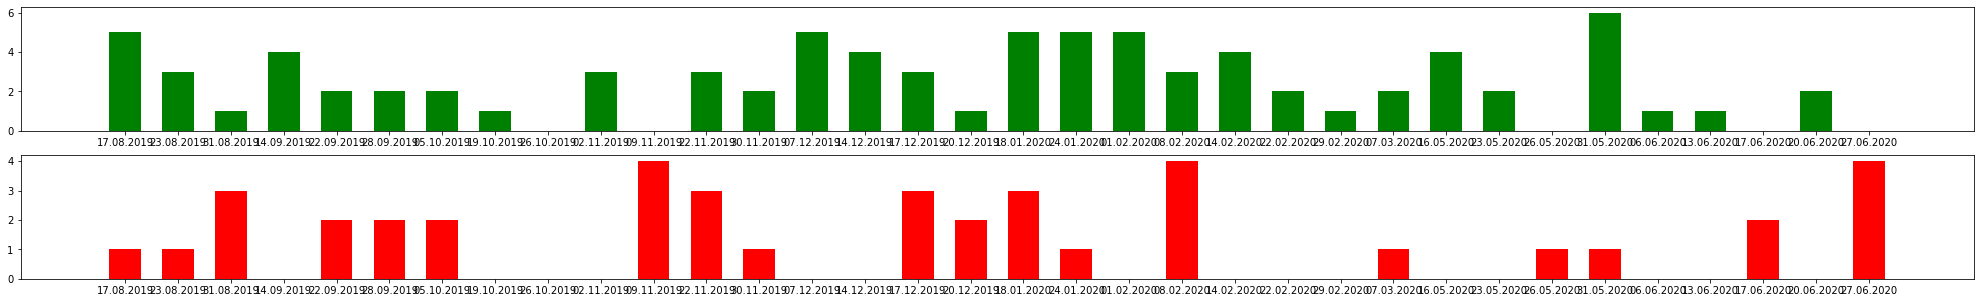

In [ ]:
fig = plt.figure(figsize=(35,5))
ax1, ax2 = fig.subplots(2, 1)
ax1.bar(x=curr_team['Date'].to_list(), height=curr_team['Sc1'].to_list(),width=0.6,color='g')
ax2.bar(x=curr_team['Date'].to_list(), height=curr_team['Sc2'].to_list(),width=0.6,color='r')
plt.show()

# **FOR EXCEL**

In [ ]:
#Игры сегодня. ПЕРВЫЕ ЛИГИ
def time_conv(d):
  d=dt.strptime(d,'%H:%M')
  d += td(hours=2)  # летнее время: 1, зимнее: 2
  d=dt.strftime(d,'%H:%M')
  return d


today_games = pd.DataFrame()
for k,v in list(links_eu.items()):
  #print(k)
  l=v[:-1]
  r = requests.get(l, headers=headers)
  s = BeautifulSoup(r.text, 'html.parser')
  try:
    tab=s.find_all('table')[0].find_all('td')
  except IndexError:
    l=links_alt2[k][-1]
    r = requests.get(l, headers=headers)
    s = BeautifulSoup(r.text, 'html.parser')
    tab = s.find_all('table')[0].find_all('tr')

  games = []
  k1 = k2 = k3 = [], [], []
  for row in s.find_all('table')[0].find_all('tr'):
    try:
      t = row.find(class_='in-match').get_text()
      games.append(t)
      k = list(row.find_all('button'))
      k = [float(x.get('data-odd')) for x in k]
      k1.append(k[0])
      k2.append(k[1])
      k3.append(k[2])
    except AttributeError:
      print('Error')
  break


  for i in range(0,len(tab),9):
    tmp = tab[i:i+9]
    if tmp.count('*') == 8:
      del tab[i:i+10]
  today = s.find_all(class_='h-text-right')
  today = [x.get_text()[6:] for x in today if 'Today' in x.get_text()]
  today = [time_conv(x) for x in today]
  tab = tab[:9 * len(today)]
  break
  games = [x.get_text() if x != '*' else np.nan for x in tab]
  kefs = [x.get('data-odd') if x != '*' else np.nan for x in tab]

  curr_games = pd.DataFrame({'Time': today, 'Champ': [k]*len(today), 'Match': games[1::9], 'K1': kefs[5::9], 'K3': kefs[7::9]})
  curr_games = curr_games.dropna(thresh=3)
  curr_games = curr_games.astype({'K1': np.float32, 'K3': np.float32})
  curr_games['K1'] = curr_games.K1.apply(lambda x: round(x, 2))
  today_games = pd.concat([today_games, curr_games])
  break

#today_games = today_games[today_games.K1 < 1.51].sort_values('Time')
#today_games.to_excel(path+'TodayGames.xlsx', index=None)
#files.download(path+'TodayGames.xlsx')
#display(today_games)

Error


In [ ]:
games

['Panserraikos - Kifisias',
 'Volos - Atromitos',
 'Panathinaikos - Panetolikos',
 'Giannina - Asteras Tripolis',
 'Aris - PAOK',
 'Olympiacos Piraeus - AEK Athens FC',
 'OFI Crete - Lamia',
 'Atromitos - OFI Crete',
 'Lamia - Panserraikos']

In [ ]:
s.find_all('table')[0].find_all('tr')[2].find(class_='in-match').get_text()

'Volos - Atromitos'

In [ ]:
#Игры сегодня. ВТОРЫЕ ЛИГИ
today_games = pd.DataFrame()
for k,v in list(links_eu2.items()):
  #print(k)
  l=v[:-1]
  r = requests.get(l, headers=headers)
  s = BeautifulSoup(r.text, 'html.parser')
  try:
    tab=s.find_all('table')[0].find_all('td')
  except IndexError:
    l=links_alt2[k][-1]
    r = requests.get(l, headers=headers)
    s = BeautifulSoup(r.text, 'html.parser')
    tab = s.find_all('table')[0].find_all('td')

  tab = [x.find('a') for x in tab]
  tab = [x if x else '*' for x in tab]
  for i in range(0,len(tab),9):
    tmp = tab[i:i+9]
    if tmp.count('*') == 8:
      del tab[i:i+10]
  today = s.find_all(class_='h-text-right')
  today = [x.get_text()[6:] for x in today if 'Today' in x.get_text()]
  today = [time_conv(x) for x in today]
  tab = tab[:9 * len(today)]

  games = [x.get_text() if x != '*' else np.nan for x in tab]
  kefs = [x.get('data-odd') if x != '*' else np.nan for x in tab]

  curr_games = pd.DataFrame({'Time': today, 'Champ': [k]*len(today), 'Match': games[1::9], 'K1': kefs[5::9], 'K3': kefs[7::9]})
  curr_games = curr_games.dropna(thresh=3)
  curr_games = curr_games.astype({'K1': np.float32, 'K3': np.float32})
  curr_games['K3'] = curr_games.K3.apply(lambda x: round(x, 2))
  today_games = today_games.append(curr_games)

today_games = today_games[today_games.K3 > 4].sort_values('Time')
today_games.to_excel(path+'TodayGames2.xlsx', index=None)
files.download(path+'TodayGames2.xlsx')
display(today_games)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Time,Champ,Match,K1,K3
1,22:00,Bel,Beveren - Anderlecht U23,1.51,5.04


In [ ]:
today_games.to_excel(path+'TodayGames2.xlsx', index=None)
files.download(path+'TodayGames2.xlsx')
display(today_games[today_games.K3 > 4])

In [ ]:
tab = [x if x else '*' for x in tab]

for i in range(0,len(tab),9):
  tmp = tab[i:i+9]
  if tmp.count('*') == 8:
    del tab[i:i+10]
  elif tmp.count('*') == 7:
    del tab[i:i+9]

tab

In [ ]:
tab

In [ ]:
games = [x.get_text() if x else '' for x in tab]
kefs = [x.get('data-odd') if x else '' for x in tab]
pd.DataFrame({'Match': games[1::9], 'K1': kefs[5::9], 'K3': kefs[7::9]})

In [ ]:
#Последние результаты
yesterday=dt.now()
yesterday -= td(days=1)
yesterday=dt.strftime(yesterday,'%d.%m')
for k,v in links_eu2.items():
  l=v[:-1]
  r = requests.get(l, headers=headers)
  s = BeautifulSoup(r.text, 'html.parser')
  try:
    tab=s.find_all('table')[1].find_all('td')
  except IndexError:
    l=links_alt[k][-1]+'/results/'
    r = requests.get(l, headers=headers)
    s = BeautifulSoup(r.text, 'html.parser')
    tab=s.find_all('table')[1].find_all('td')
  if len(tab) < 3:
    tab=s.find_all('table')[0].find_all('td')

  prev_results=pd.read_excel(path+f'{k}21.xlsx')
  if len(tab) > len(prev_results):
    print(k)
    teams=tab[::6]
    scores=tab[1::6]
    kefs1=tab[2::6]
    kefs2=tab[3::6]
    kefs3=tab[4::6]
    dates=tab[5::6]

    df=np.array([0]*8).reshape(1,8)
    for c in range(len(teams)):
      t1=teams[c].find_all('span')[0].get_text()
      t2=teams[c].find_all('span')[1].get_text()
      sc=scores[c].find('a').get_text()
      if 'A' not in sc and 'E' not in sc and 'O' not in sc:
        sc1=int(sc.split(':')[0])
        sc2=int(sc.split(':')[1])
        if sc1>sc2:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k1=kefs1[c].find('span').find('span').find('span').get('data-odd')
            k2=kefs2[c].get('data-odd')
            k3=kefs3[c].get('data-odd')
          else:
            k1=k2=k3=0
        elif sc1<sc2:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k3=kefs3[c].find('span').find('span').find('span').get('data-odd')
            k2=kefs2[c].get('data-odd')
            k1=kefs1[c].get('data-odd')
          else:
            k1=k2=k3=0
        else:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k2=kefs2[c].find('span').find('span').find('span').get('data-odd')
            k1=kefs1[c].get('data-odd')
            k3=kefs3[c].get('data-odd')
          else:
            k1=k2=k3=0
        row=np.array([t1, t2, sc1, sc2, k1, k2, k3, dates[c].get_text()[:5].replace('Yeste', yesterday)])
        df=np.concatenate([df,[row]])
    df=df[1:]
    df=pd.DataFrame(df[::-1], columns=['Team1','Team2', 'Sc1','Sc2','k1','k2','k3','Date'])
    df[list(df.columns)[2:7]]=df[list(df.columns)[2:7]].apply(pd.to_numeric)
    df.to_excel(path+f'{k}22.xlsx', index=None)

# **Минуты забитых голов**

In [13]:
# Минуты забитых голов
def get_minutes(s):
  s = s.split('\n')[1:-1]
  s = [x.replace('(penalty kick) ', '') for x in s]
  s = [x.replace('(own goal) ', '') for x in s]
  s = [x.split('.')[0] for x in s]
  s = [x[:-2] if '+' in x else x for x in s]
  return ','.join(s)

def get_proxy():
  proxy = FreeProxy(rand=True).get()   # , https=True
  proxies = {'http': proxy}
  print(f'Proxy: {proxy}')
  return proxies


links_eu={
       # 02.08 'Aus':'https://www.betexplorer.com/football/austria/bundesliga-',
       #'Bea.':'https://www.betexplorer.com/football/belarus/vysshaya-liga-',
       # 26.07 'Bel':'https://www.betexplorer.com/football/belgium/jupiler-pro-league-',
       'Bul':'https://www.betexplorer.com/football/bulgaria/parva-liga-',
       # 02.08 'Cro':'https://www.betexplorer.com/football/croatia/hnl-',
       #'Cze':'https://www.betexplorer.com/football/czech-republic/chance-liga-',
       #'Den':'https://www.betexplorer.com/football/denmark/superliga-',
       # 16.08 'Eng':'https://www.betexplorer.com/football/england/premier-league-',
       # 18.08 'Fra':'https://www.betexplorer.com/football/france/ligue-1-',
       # 23.08 'Ger':'https://www.betexplorer.com/football/germany/bundesliga-',
       #'Gre':'https://www.betexplorer.com/football/greece/super-league-',
       # 09.08 'Hol':'https://www.betexplorer.com/football/netherlands/eredivisie-',
       # 26.07 'Hun':'https://www.betexplorer.com/football/hungary/otp-bank-liga-',
       # 18.08 'Ita':'https://www.betexplorer.com/football/italy/serie-a-',
       # 10.08 'NIr':'https://www.betexplorer.com/football/northern-ireland/nifl-premiership-',
       #'Pol':'https://www.betexplorer.com/football/poland/ekstraklasa-',
       #'Por':'https://www.betexplorer.com/football/portugal/liga-portugal-',
       #'Rom':'https://www.betexplorer.com/football/romania/liga-1-',
       #'Rus':'https://www.betexplorer.com/football/russia/premier-league-',
       #'Ser':'https://www.betexplorer.com/football/serbia/super-liga-',
       # 03.08 'Sco':'https://www.betexplorer.com/football/scotland/premiership-',
       #'Sla':'https://www.betexplorer.com/football/slovakia/nike-liga-',
       #'Sle':'https://www.betexplorer.com/football/slovenia/prva-liga-',
       # 15.08 'Spa':'https://www.betexplorer.com/football/spain/laliga-',
       # 09.08'Wal':'https://www.betexplorer.com/football/wales/cymru-premier-',
       #'Sui':'https://www.betexplorer.com/football/switzerland/super-league-',
       #'Tur':'https://www.betexplorer.com/football/turkey/super-lig-',
       #'Ice.':'https://www.betexplorer.com/football/iceland/besta-deild-karla-',
       #'Swe.':'https://www.betexplorer.com/football/sweden/allsvenskan-',
       #'Nor.':'https://www.betexplorer.com/football/norway/eliteserien-',
       #'Fin.':'https://www.betexplorer.com/football/finland/veikkausliiga-',
}
yes_date = dt.now()
yes_date -= td(days=1)
yes_date = dt.strftime(yes_date, '%d.%m.')

for k,v in links_eu.items():
  if 'stage' in v:
    r = requests.get(v, headers=headers)
  else:
    r = requests.get(v[:-1] + '/results/', headers=headers)
  s = BeautifulSoup(r.text, 'html.parser')
  links = s.find_all(class_='in-match')
  teams = [x.get_text() for x in links][::-1]
  scores = s.find_all(class_='h-text-center')
  scores = [x.get_text() for x in scores][::-1]
  scores = list(filter(lambda x: x not in ['2', 'X', '1'], scores))
  dates = s.find_all(class_='h-text-right')
  dates = [x.get_text().replace('Yesterday', yes_date) for x in dates][::-1]
  dates = [x + '2024' if len(x) == 6 else x for x in dates]
  links = ['https://www.betexplorer.com' + x.get('href') for x in links][::-1]

  proxies = get_proxy()
  all_games = []
  for i, link in enumerate(links):
    ok = False
    while not ok:
      try:
        ok = True
        if scores[i] != 'POSTP.':
          r = requests.get(link, headers=headers, proxies=proxies)
          s = BeautifulSoup(r.text, 'html.parser')
          goals = s.find_all(class_='table-main')
          score = s.find(class_='list-details__item__score').get_text()
          home = teams[i].split(' - ')[0]
          away = teams[i].split(' - ')[1]
          if score == '0:0':
            all_games += [[dates[i], home, away, score, '0', '0']]
          elif score[0] == '0':
            all_games += [[dates[i], home, away, score, '0', get_minutes(goals[1].get_text())]]
          elif score[-1] == '0':
            all_games += [[dates[i], home, away, score, get_minutes(goals[0].get_text()), '0']]
          else:
            all_games += [[dates[i], home, away, score, get_minutes(goals[0].get_text()), get_minutes(goals[1].get_text())]]
      except AttributeError:
        proxies = get_proxy()
        ok = False

  curr_goals = pd.DataFrame(np.array(all_games, dtype=object), columns='Date Home Away Score Team1 Team2'.split())
  curr_goals.to_csv(path + k + '_goals.csv', sep='*', index=False)
  print('Finish')

Proxy: http://114.129.2.82:8081
Finish


In [ ]:
def goal_minute(l:list, minute: int):
  l = [int(x) for x in l]
  ll = [x for x in l if x > minute]
  return 'Y' if len(ll) > 0 else 'N'

def summa_minute(l:list):
  l = [int(x) for x in l]
  s = sum(l)
  return s

curr_goals = pd.read_csv(path + 'Fin2-goals.csv', sep='*').fillna('0')
team1 = curr_goals['Team1'].to_list()
team2 = curr_goals['Team2'].to_list()
minutes = [a+','+b for a,b in zip(team1,team2)]
summa = [summa_minute(x.split(',')) for x in minutes]
minutes = [goal_minute(x.split(','), 85) for x in minutes]

curr_goals['GoalMin'] = minutes
curr_goals['SumMin'] = summa

curr_goals['GoalMin'].value_counts()

GoalMin
N    49
Y    21
Name: count, dtype: int64

In [ ]:
curr_goals.query("Home == 'Young Boys' or Away == 'Young Boys'")

,Unnamed: 0,Date,Home,Away,Score,Team1,Team2,GoalMin,SumMin


# **Результаты этого сезона**

In [ ]:
#Результаты этого сезона
links={'Rom':'https://www.betexplorer.com/football/romania/liga-1-',}
df_all = pd.DataFrame()
for k,v in links.items():
  print(k)
  l=v[:-1]+'/results/'
  r = requests.get(l, headers=headers)
  s = BeautifulSoup(r.text, 'html.parser')
  try:
    tab=s.find_all('table')[1].find_all('td')
  except IndexError:
    l=links_alt[k.replace('.', '')]+'/results/'
    r = requests.get(l, headers=headers)
    s = BeautifulSoup(r.text, 'html.parser')
    tab=s.find_all('table')[1].find_all('td')
  if len(tab) < 3:
    tab=s.find_all('table')[0].find_all('td')

  teams=tab[::6]
  scores=tab[1::6]
  kefs1=tab[2::6]
  kefs2=tab[3::6]
  kefs3=tab[4::6]
  dates=tab[5::6]

  df=np.array([0]*9).reshape(1,9)
  for c in range(len(teams)):
    #if dates[c].get_text() == '10.12.':   # Если нужна конкретная дата
    t1=teams[c].find_all('span')[0].get_text()
    t2=teams[c].find_all('span')[1].get_text()
    sc=scores[c].find('a').get_text()
    if 'A' not in sc and 'E' not in sc and 'O' not in sc:
      sc1=int(sc.split(':')[0])
      sc2=int(sc.split(':')[1])
      if sc1>sc2:
        if str(kefs1[c]) != '<td>\xa0</td>':
          k1=kefs1[c].find('span').find('span').find('span').get('data-odd')
          k2=kefs2[c].get('data-odd')
          k3=kefs3[c].get('data-odd')
        else:
          k1=k2=k3=0
      elif sc1<sc2:
        if str(kefs1[c]) != '<td>\xa0</td>':
          k3=kefs3[c].find('span').find('span').find('span').get('data-odd')
          k2=kefs2[c].get('data-odd')
          k1=kefs1[c].get('data-odd')
        else:
          k1=k2=k3=0
      else:
        if str(kefs1[c]) != '<td>\xa0</td>':
          k2=kefs2[c].find('span').find('span').find('span').get('data-odd')
          k1=kefs1[c].get('data-odd')
          k3=kefs3[c].get('data-odd')
        else:
          k1=k2=k3=0
      #row=np.array([t1, t2, sc1, sc2, float(k1.replace(',','.')), float(k2.replace(',','.')), float(k3.replace(',','.')), dates[c].get_text()[:5]])
      row=np.array([t1, t2, sc1, sc2, k1, k2, k3, dates[c].get_text()[:5], k])
      df=np.concatenate([df,[row]])
  df=df[1:]
  df=pd.DataFrame(df[::-1], columns=['Team1','Team2', 'Sc1','Sc2','k1','k2','k3','Date', 'Ch'])
  df[list(df.columns)[2:7]]=df[list(df.columns)[2:7]].apply(pd.to_numeric)

  # df_all = pd.concat([df_all, df])  если пропустил дату!!

  #df.to_excel(path+f'2021/{k}-2021.xlsx', index=None)
  #df.to_csv(path+f'2021/{k}-2-2021.csv', index=None)
  # df.to_csv(path+f"{k.replace('.', '')}-2023.csv", index=None)
  if len(df) > 0:
    df.to_excel(path+f"{k.replace('.', '')}-2024.xlsx", index=None)
    files.download(path+f"{k.replace('.', '')}-2024.xlsx")

Rom


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
plt.figure(figsize=(15,2))
plt.bar([1],[4],width=0.7,color='g')
plt.bar([2],[5],width=0.7,color='r')
plt.bar([3],[6],width=0.7,color='y')
plt.show()



In [ ]:
print('Zenit  \033[42m W \033[0m\033[41m L \033[0m\033[43m D \033[0m')

In [ ]:
# Последние результаты
l=links_all['Ital'][:-1]+'/'
r = requests.get(l, headers=headers)
s = BeautifulSoup(r.text, 'html.parser')
results=s.find_all('table')[1].find_all('tr')
c=1
while 'Round' not in results[c].get_text() and c < len(results)-1:
  c += 1
if c==len(results)-1:
  results=results[1:]
else:
  results=results[1:c]


In [ ]:
# Статистика из csv-файлов
files = os.listdir(path)
files = sorted(files)
country = files[0][:4]
print(country)
for file in files:
  df = pd.read_csv(path+file)
  year = file[5:9]
  if country != file[:4]:
    print()
    print(file[:4])
    country = file[:4]
  dogs = df.query("WinK==1 & Win>4")
  dogs_index = dogs.index
  win = draw = lose = 0, 0, 0
  for i in dogs_index:
    team=df.iloc[i,0]  # [i,1] - если смотрим победы гостей и WinK==3; [i,0] - победы хозяев и WinK==1
    #display(pd.DataFrame(df.iloc[i]).T)
    for di in range(i+1, len(df)):
      if df.iloc[di,0]==team:
        #display(pd.DataFrame(df.iloc[di]).T)
        if df.iloc[di,7]==3:
          #print('\033[101m LOSE \033[0m')
          lose += 1
        elif  df.iloc[di,7]==2:
          #print('\033[100m DRAW \033[0m')
          draw += 1
        else:
          #print('\033[102m WIN \033[0m')
          win += 1
        break
      elif df.iloc[di,1]==team:
        #display(pd.DataFrame(df.iloc[di]).T)
        if df.iloc[di,7]==1:
          #print('\033[101m LOSE \033[0m')
          lose += 1
        elif  df.iloc[di,7]==2:
          #print('\033[100m DRAW \033[0m')
          draw += 1
        else:
          #print('\033[102m WIN \033[0m')
          win += 1
        break

  print(f'{year}:  Побед: {win}. Ничьих: {draw}. Поражений: {lose}.')

In [ ]:
soup

In [ ]:
# Финальный модуль сбора статистики
#links_eu={'Ire':'https://www.betexplorer.com/football/ireland/premier-division-',}

links_eu={

       'Hol':'https://www.betexplorer.com/football/netherlands/eredivisie-',

}

for country,link in links_eu.items():
  print()
  for year in range(2022,2023):
    if '.' in country:
      curr_link = link + f'{year}/results/'
    elif year == 2022:
      curr_link = link[:-1] + '/results/'
    else:
      curr_link = link + f'{year}-{year+1}/results/'
    r = requests.get(curr_link, headers=headers)
    soup = BeautifulSoup(r.text, 'html.parser')
    stage = soup.find_all(class_='list-tabs__item')
    if not stage:
      link = links_alt[country]
      if '.' in country:
        curr_link = link + f'{year}/results/'
      elif year == 2022:
        curr_link = link[:-1] + '/results/'
      else:
        curr_link = link + f'{year}-{year+1}/results/'
      r = requests.get(curr_link, headers=headers)
      soup = BeautifulSoup(r.text, 'html.parser')
      stage = soup.find_all(class_='list-tabs__item')
    print(country,len(stage))
    if len(stage) > 5:
      stage = [x.find('a').get('href') for x in stage if x.get_text()=='Main']
      curr_link += stage[0]
      r = requests.get(curr_link, headers=headers)
      soup = BeautifulSoup(r.text, 'html.parser')
      print(country, '-', curr_link)

    #sub_links=soup.find_all(class_='list-tabs__item')
    #sub_links=[x.get('href') for x in sub_links if x.get_text() in ['Apertura','Clausura']]
    #print(sub_links)

    tab=soup.find_all('td')[:-2]
    teams=tab[::6]
    scores=tab[1::6]
    kefs1=tab[2::6]
    kefs2=tab[3::6]
    kefs3=tab[4::6]
    dates=tab[5::6]

    df=np.array([0]*10).reshape(1,10)
    for c in range(len(teams)):
      t1=teams[c].find_all('span')[0].get_text()
      t2=teams[c].find_all('span')[1].get_text()
      sc=scores[c].find('a').get_text()
      if 'A' not in sc and 'E' not in sc:
        sc1=int(sc.split(':')[0])
        sc2=int(sc.split(':')[1])
        if sc1>sc2:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k1=kefs1[c].find('span').find('span').find('span').get('data-odd')
            k2=kefs2[c].get('data-odd')
            k3=kefs3[c].get('data-odd')
          else:
            k1=k2=k3=0
          win=k1
          wink=1
        elif sc1<sc2:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k3=kefs3[c].find('span').find('span').find('span').get('data-odd')
            k2=kefs2[c].get('data-odd')
            k1=kefs1[c].get('data-odd')
          else:
            k1=k2=k3=0
          win=k3
          wink=3
        else:
          if str(kefs1[c]) != '<td>\xa0</td>':
            k2=kefs2[c].find('span').find('span').find('span').get('data-odd')
            k1=kefs1[c].get('data-odd')
            k3=kefs3[c].get('data-odd')
          else:
            k1=k2=k3=0
          win=k2
          wink=2
        row=np.array([t1, t2, sc1, sc2, float(k1), float(k2), float(k3), wink, float(win), dates[c].get_text()])
        df=np.concatenate([df,[row]])
    df=df[1:]
    df=pd.DataFrame(df[::-1], columns=['Team1','Team2', 'Sc1','Sc2','k1','k2','k3','WinK', 'Win', 'Date'])
    df[list(df.columns)[2:9]]=df[list(df.columns)[2:9]].apply(pd.to_numeric)
    df.to_csv(path + f'{year}/{country[:4]}-{year}.csv', index=None)

x = '''    dogs=df.query("WinK==1 & Win>4")
    dogs_index=dogs.index
    win=draw=lose=0
    for i in dogs_index:
      team=df.iloc[i,0]  # [i,1] - если смотрим победы гостей и WinK==3; [i,0] - победы хозяев и WinK==1
      #display(pd.DataFrame(df.iloc[i]).T)
      for di in range(i+1, len(df)):
        if df.iloc[di,0]==team:
          #display(pd.DataFrame(df.iloc[di]).T)
          if df.iloc[di,7]==3:
            #print('\033[101m LOSE \033[0m')
            lose += 1
          elif  df.iloc[di,7]==2:
            #print('\033[100m DRAW \033[0m')
            draw += 1
          else:
            #print('\033[102m WIN \033[0m')
            win += 1
          break
        elif df.iloc[di,1]==team:
          #display(pd.DataFrame(df.iloc[di]).T)
          if df.iloc[di,7]==1:
            #print('\033[101m LOSE \033[0m')
            lose += 1
          elif  df.iloc[di,7]==2:
            #print('\033[100m DRAW \033[0m')
            draw += 1
          else:
            #print('\033[102m WIN \033[0m')
            win += 1
          break

    print(f'{year}:  Побед: {win}. Ничьих: {draw}. Поражений: {lose}.')'''

In [ ]:
https://www.betexplorer.com/football/netherlands/eredivisie/results/

In [ ]:
#сбор статистики 1
link=links_eu['Ita']+r'2019-2020/results/'
r = requests.get(link, headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')
tab=soup.find_all('td')[:-2]
teams=tab[::6]
scores=tab[1::6]
kefs1=tab[2::6]
kefs2=tab[3::6]
kefs3=tab[4::6]
dates=tab[5::6]

In [ ]:
#сбор статистики 2
df=np.array([0]*10).reshape(1,10)
for c in range(len(teams)):
  t1=teams[c].find_all('span')[0].get_text()
  t2=teams[c].find_all('span')[1].get_text()
  sc=scores[c].find('a').get_text()
  sc1=int(sc.split(':')[0])
  sc2=int(sc.split(':')[1])
  if sc1>sc2:
    k1=kefs1[c].find('span').find('span').find('span').get('data-odd')
    k2=kefs2[c].get('data-odd')
    k3=kefs3[c].get('data-odd')
    win=k1
    wink=1
  elif sc1<sc2:
    k3=kefs3[c].find('span').find('span').find('span').get('data-odd')
    k2=kefs2[c].get('data-odd')
    k1=kefs1[c].get('data-odd')
    win=k3
    wink=3
  else:
    k2=kefs2[c].find('span').find('span').find('span').get('data-odd')
    k1=kefs1[c].get('data-odd')
    k3=kefs3[c].get('data-odd')
    win=k2
    wink=2
  row=np.array([t1, t2, sc1, sc2, float(k1), float(k2), float(k3), wink, float(win), dates[c].get_text()[:5]])
  df=np.concatenate([df,[row]])
df=df[1:]
df=pd.DataFrame(df[::-1], columns=['Team1','Team2', 'Sc1','Sc2','k1','k2','k3','WinK', 'Win', 'Date'])
df[list(df.columns)[2:9]]=df[list(df.columns)[2:9]].apply(pd.to_numeric)
#df.to_csv(path+'Spain.csv', index=None)

In [ ]:
#сбор статистики 3
dogs=df.query("WinK==1 & Win>4")
dogs_index=dogs.index
win=draw=lose=0

for i in dogs_index:
  team=df.iloc[i,0]  # [i,1] - если смотрим победы гостей и WinK==3; [i,0] - победы хозяев и WinK==1
  display(pd.DataFrame(df.iloc[i]).T)
  for di in range(i+1, len(df)):
    if df.iloc[di,0]==team:
      display(pd.DataFrame(df.iloc[di]).T)
      if df.iloc[di,7]==3:
        print('\033[101m LOSE \033[0m')
        lose += 1
      elif  df.iloc[di,7]==2:
        print('\033[100m DRAW \033[0m')
        draw += 1
      else:
        print('\033[102m WIN \033[0m')
        win += 1
      break
    elif df.iloc[di,1]==team:
      display(pd.DataFrame(df.iloc[di]).T)
      if df.iloc[di,7]==1:
        print('\033[101m LOSE \033[0m')
        lose += 1
      elif  df.iloc[di,7]==2:
        print('\033[100m DRAW \033[0m')
        draw += 1
      else:
        print('\033[102m WIN \033[0m')
        win += 1
      break

print(f'Побед: {win}. Ничьих: {draw}. Поражений: {lose}.')

In [ ]:
teams=tab[::6]
scores=tab[1::6]
kefs1=tab[2::6]
kefs2=tab[3::6]
kefs3=tab[4::6]
dates=[x.get_text()[:5] for x in dates]

In [ ]:
t1=tab[0].find_all('span')[0].get_text()
t2=tab[0].find_all('span')[1].get_text()
sc=tab[1].find('a').get_text()
k1=tab[2].get('data-odd')
k2=tab[3].find('span').find('span').find('span').get('data-odd')
k3=tab[4].get('data-odd')
date=tab[5].get_text()[:5]

print(t1,t2,sc, k1, k2, k3, date)

In [ ]:
soup.find_all('td')[:6]

In [ ]:
tab=pd.read_html(path+'football.html')
tab

In [ ]:
r = requests.get(links_all['Ita'], headers=headers)
soup = BeautifulSoup(r.text, 'html.parser')
link=links_all['Ita']
print('OK')

In [ ]:
def getTeamsLink(link):
  f_r=requests.get(link,headers=headers)
  f_s=BeautifulSoup(f_r,'html.parser')
  tt=f_s.find_all(class_='list-details__item__title')
  display(tt[0])
#t1=soup.find_all(class_='in-match')[:10]
link1=list(map(lambda x: www+x.get('href'),t1))
#teams=list(map(getTeamsLink,link1))
f_r=requests.get(str(link1[0]),headers=headers)
#f_s=BeautifulSoup(f_r,'html.parser')
#tt=f_s.find_all(class_='list-details__item__title')
type(link1[0])

In [ ]:
g=soup.find_all(class_='h-text-left')[1:]
links=[]
for l in g:
  if 'Round' not in l.get_text():
    s=l.find(class_='in-match').get('href')
    links.append(www+s)
  else:
    break
#display(links)
Ita=pd.DataFrame()
for el in links:
  r2 = requests.get(el, headers=headers)
  soup2 = BeautifulSoup(r2.text, 'html.parser')
  teams=soup2.find_all(class_='list-details__item__title')
  team1_link=str(teams[0]).split('"')[3]
  team2_link=str(teams[1]).split('"')[3]
  team1=teams[0].get_text()
  team2=teams[1].get_text()
  tmp=pd.DataFrame(pd.Series([team1,f'{www}{team1_link}results/'])).T
  Ita=Ita.append(tmp)
  tmp=pd.DataFrame(pd.Series([team2,f'{www}{team2_link}results/'])).T
  Ita=Ita.append(tmp)
Ita.columns=['Team','Link']
Ita

In [ ]:
display(soup.find_all('table', class_="table-main h-mBet5 js-tablebanner-t js-tablebanner-ntb")[0])

In [ ]:
r2 = requests.get(links[0], headers=headers)
soup2 = BeautifulSoup(r2.text, 'html.parser')
teams=soup2.find_all(class_='list-details__item__title')
goals=soup2.find('table',class_="table-main").get_text()
team1_link=str(teams[0]).split('"')[3]
team2_link=str(teams[1]).split('"')[3]
team1=teams[0].get_text()
team2=teams[1].get_text()
score=soup2.find(class_='list-details__item__score').get_text()
score1=int(score.split(':')[0])
score2=int(score.split(':')[1])
times=soup2.find(class_='list-details__item__partial').get_text().split(', ')
t11=int(times[0].split(':')[0].replace('(',''))
t12=int(times[0].split(':')[1])
t21=int(times[1].split(':')[0])
t22=int(times[1].split(':')[1].replace(')',''))
data=str(soup2.find(class_='list-details__item__date')).split(' ')[2]
data=data.split('"')[1].split(',')
time=data[3]+':'+data[4]
data=data[0]+'.'+data[1]

goals=soup2.find_all(class_='table_main')
print(team1_link,team2_link)
print(team1,team2,score1,score2,t11,t12,t21,t22,data,time)